# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [ ]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [3]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [4]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [7]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [9]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [11]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,한식 일반 음식점업,커피전문점,기타주점업
0,종로구,5912,3613,1413
1,중구,6414,3542,982
2,용산구,2987,2076,1332
3,성동구,2785,1859,621
4,광진구,2861,1887,1577


In [13]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [15]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [17]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,한식 일반 음식점업,커피전문점,기타주점업,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,11486,7273,2528,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,3388,1660,1349,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2663,1095,1275,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,4584,2530,1709,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,3689,2049,1672,248571,248566,497137


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.

### 1) 가설 1: 혼잡도(총 이동인구/총 이동시간)가 클수록 정노비율(정류장수/노선수)이 작을 것이다.

### 2) 가설 2: 정류장 수가 많을 수록 총 이동시간이 오래 걸릴 것이다. 업종합계가 클 수록 총 이동인구는 많을 것이다.

### 3) 가설 3: 총 승객수가 많고, 혼잡도(총 이동인구/총 이동시간)가 높고, 인구수가 많은 곳에 노선이 필요할 것이다.

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
- 기초통계량
- 분포  
- 위 정보로부터 파악한 내용(비즈니스) 정리  
- 추가 분석해볼 사항 도출 등

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### 함수 선언

In [21]:
def eda_1_num(data, var, bins = 30):
    # 단변량 분석
    # 기초통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

In [23]:
def eda_1(data, feature, target):
    # 상관계수 계산 및 상관분석 
    result = spst.pearsonr(data[feature], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    print('*'  * 100)
    mean_target = data[target].mean()
    mean_feature=data[feature].mean()
    # 그래프 출력
    plt.figure(figsize=(10, 10))

    # 산점도
    plt.subplot(3, 1, 1)
    sns.scatterplot(x=feature, y=target, data=data)
    
    # 자치구 이름 추가
    for i in range(data.shape[0]):
        plt.text(data[feature][i], data[target][i], data['자치구'][i], fontsize=9, ha='right')
    
    plt.grid()
    
    # 회귀선 그래프
    plt.subplot(3, 1, 2)
    sns.regplot(x=feature, y=target, data=data)
    
    # 자치구 이름 추가
    for i in range(data.shape[0]):
        plt.text(data[feature][i], data[target][i], data['자치구'][i], fontsize=9, ha='right')
    
    plt.grid()
   
    # 평균 선 추가 (총 이동시간)
    plt.axhline(mean_target, color='r', linestyle='--', label=f'{target} 평균')
    plt.axvline(mean_feature, color='b', linestyle='--', label=f'{feature} 평균')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    # 조인트 플롯
    sns.jointplot(x=feature, y=target, data=data, kind='scatter')
    
    plt.show()

In [25]:
def show_bar_1(df, name, feature):
    bar_width=0.35
    plt.figure(figsize=(10,5))
    x = range(len(df[name]))
    plt.bar(x, df[feature],width=bar_width,label=feature, align='center')

   
    plt.legend()
    plt.xlabel('자치구')
    plt.ylabel(feature)
    plt.title(f'자치구별 {feature}')
    plt.grid()
    plt.xticks([i + bar_width / 2 for i in x], df['자치구'],rotation=45)

    plt.show()

In [27]:
def show_bar_2(df, name, feature1, feature2,y):
    bar_width=0.35
    plt.figure(figsize=(10,5))
    x = range(len(df[name]))
    plt.bar(x, df[feature1],width=bar_width,label=feature1, align='center')
    plt.bar([i + bar_width for i in x], df[feature2],width=bar_width,  label=feature2, color='orange', align='center')
   
    plt.legend()
    plt.xlabel('자치구')
    plt.ylabel(y)
    plt.title(f'자치구별 {feature1}과 {feature2}')
    plt.grid()
    plt.xticks([i + bar_width / 2 for i in x], df['자치구'],rotation=45)

    plt.show()

### 1) 이다연 님

### 혼잡도(총 이동인구/총 이동시간)가 클수록 정노비율(정류장수/노선수)이 작을 것이다.

In [37]:
# 변수 생성
df['정노비율'] = df['정류장수'] /df['노선수']
df['혼잡도'] = df['총 이동인구']/df['총 이동 시간']
result = df.loc[:, ['자치구', '정노비율', '혼잡도']].sort_values(by= '정노비율',ascending=False)
display(result)

,자치구,정노비율,혼잡도
1,강동구,15.666667,0.943101
3,강서구,10.462963,0.849371
8,노원구,8.114754,0.784699
24,중랑구,7.680000,0.630698
17,송파구,7.677419,1.180422
15,성동구,7.448276,0.697721
21,은평구,6.500000,0.749490
5,광진구,6.465116,0.736562
9,도봉구,6.421053,0.553587
7,금천구,6.142857,0.467728


<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
혼잡도,25.0,0.776948,0.196829,0.467728,0.677084,0.729917,0.849371,1.378088


<< 그래프 >>


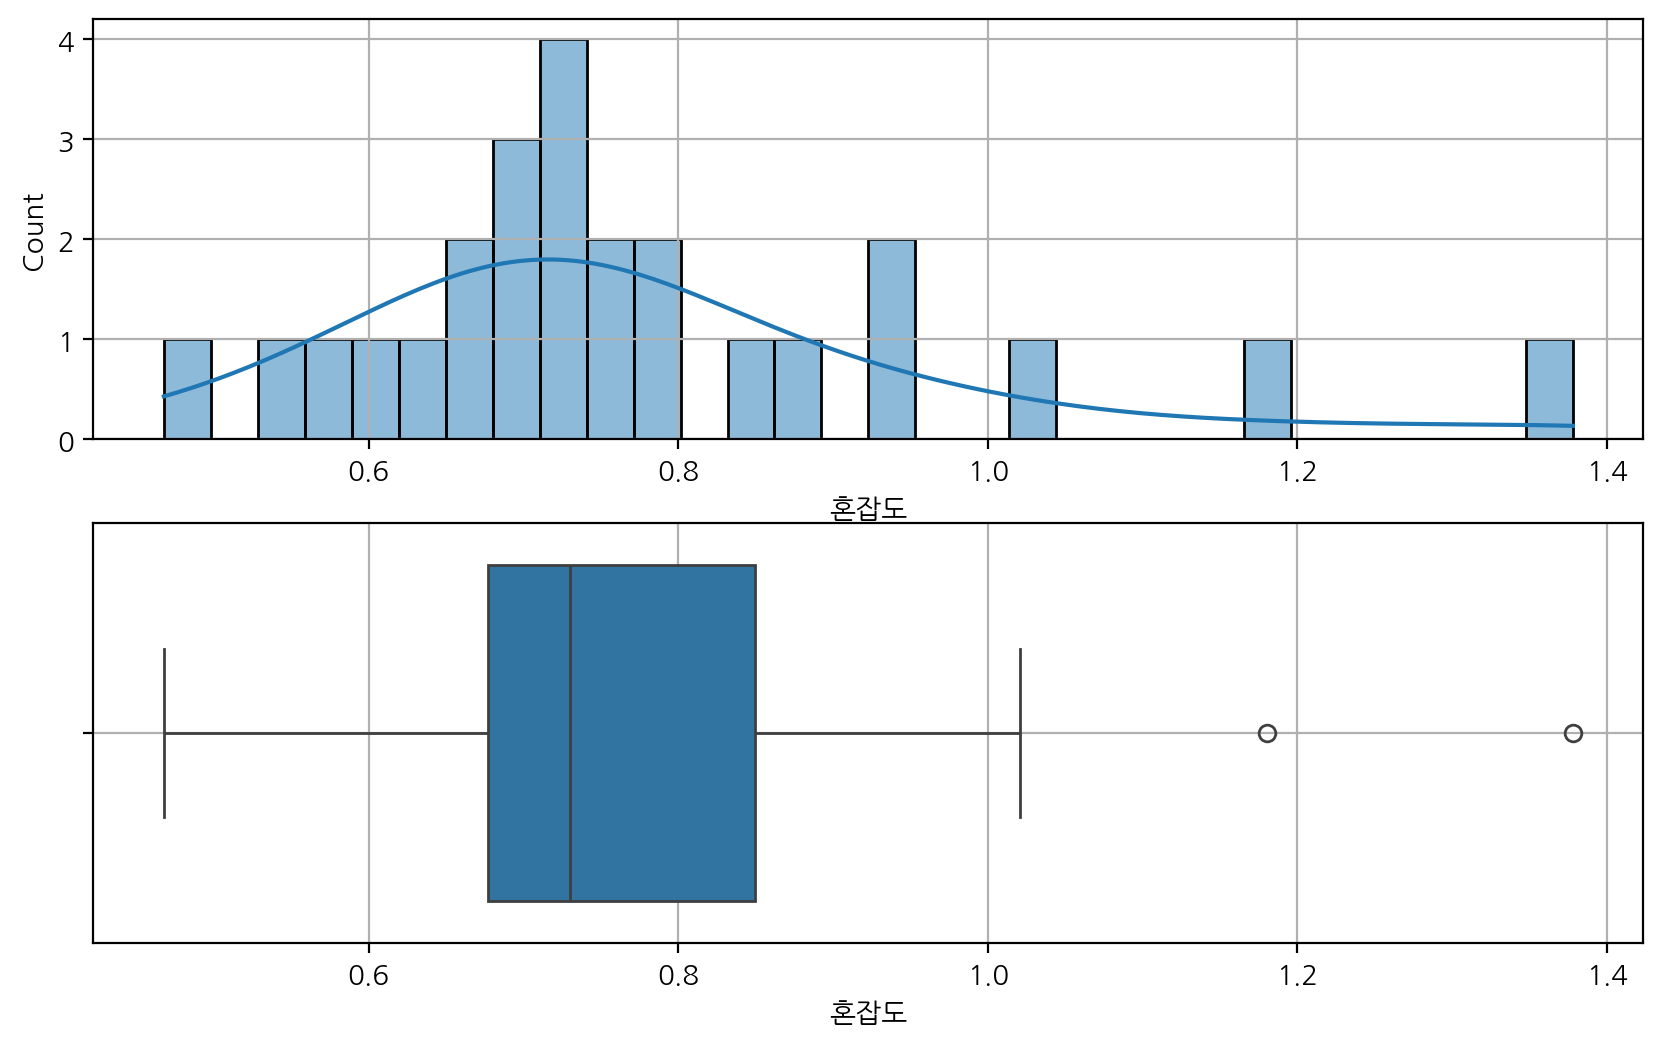

In [39]:
eda_1_num(df, '혼잡도')

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
정노비율,25.0,6.200621,2.620658,1.686275,4.642857,5.774648,6.5,15.666667


<< 그래프 >>


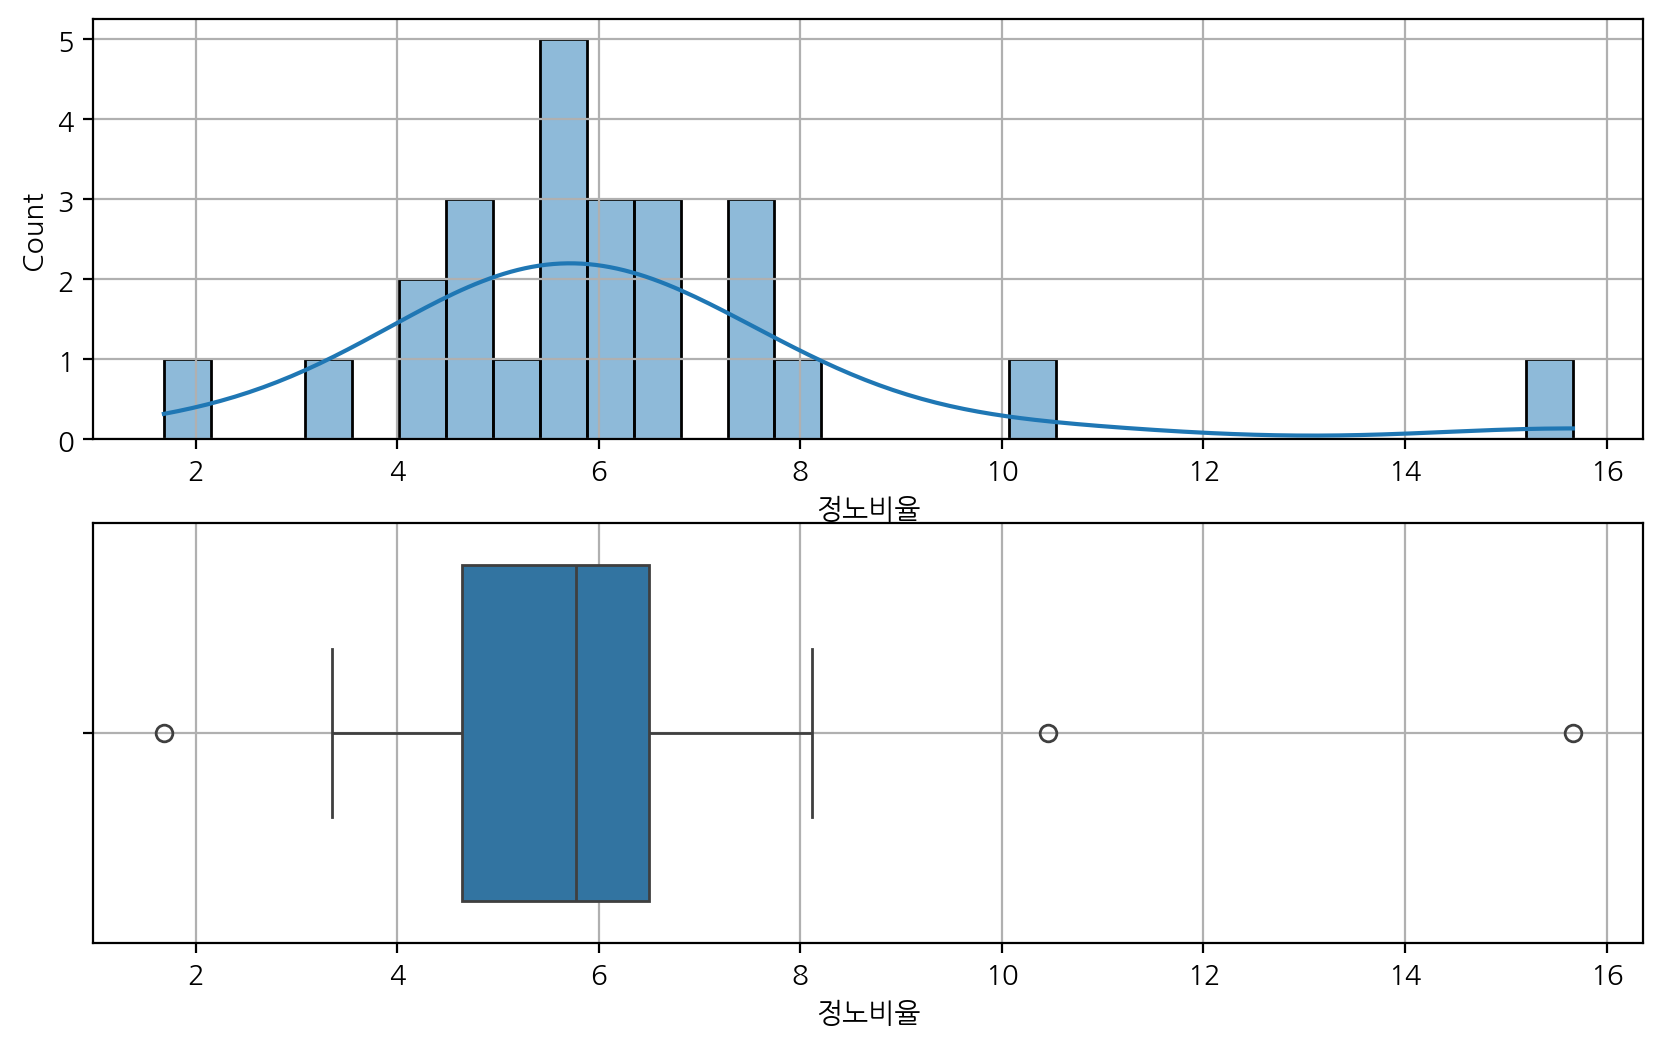

In [41]:
eda_1_num(df, '정노비율')

상관계수 : 0.1734932027899883, p-value : 0.40689396564674124
****************************************************************************************************


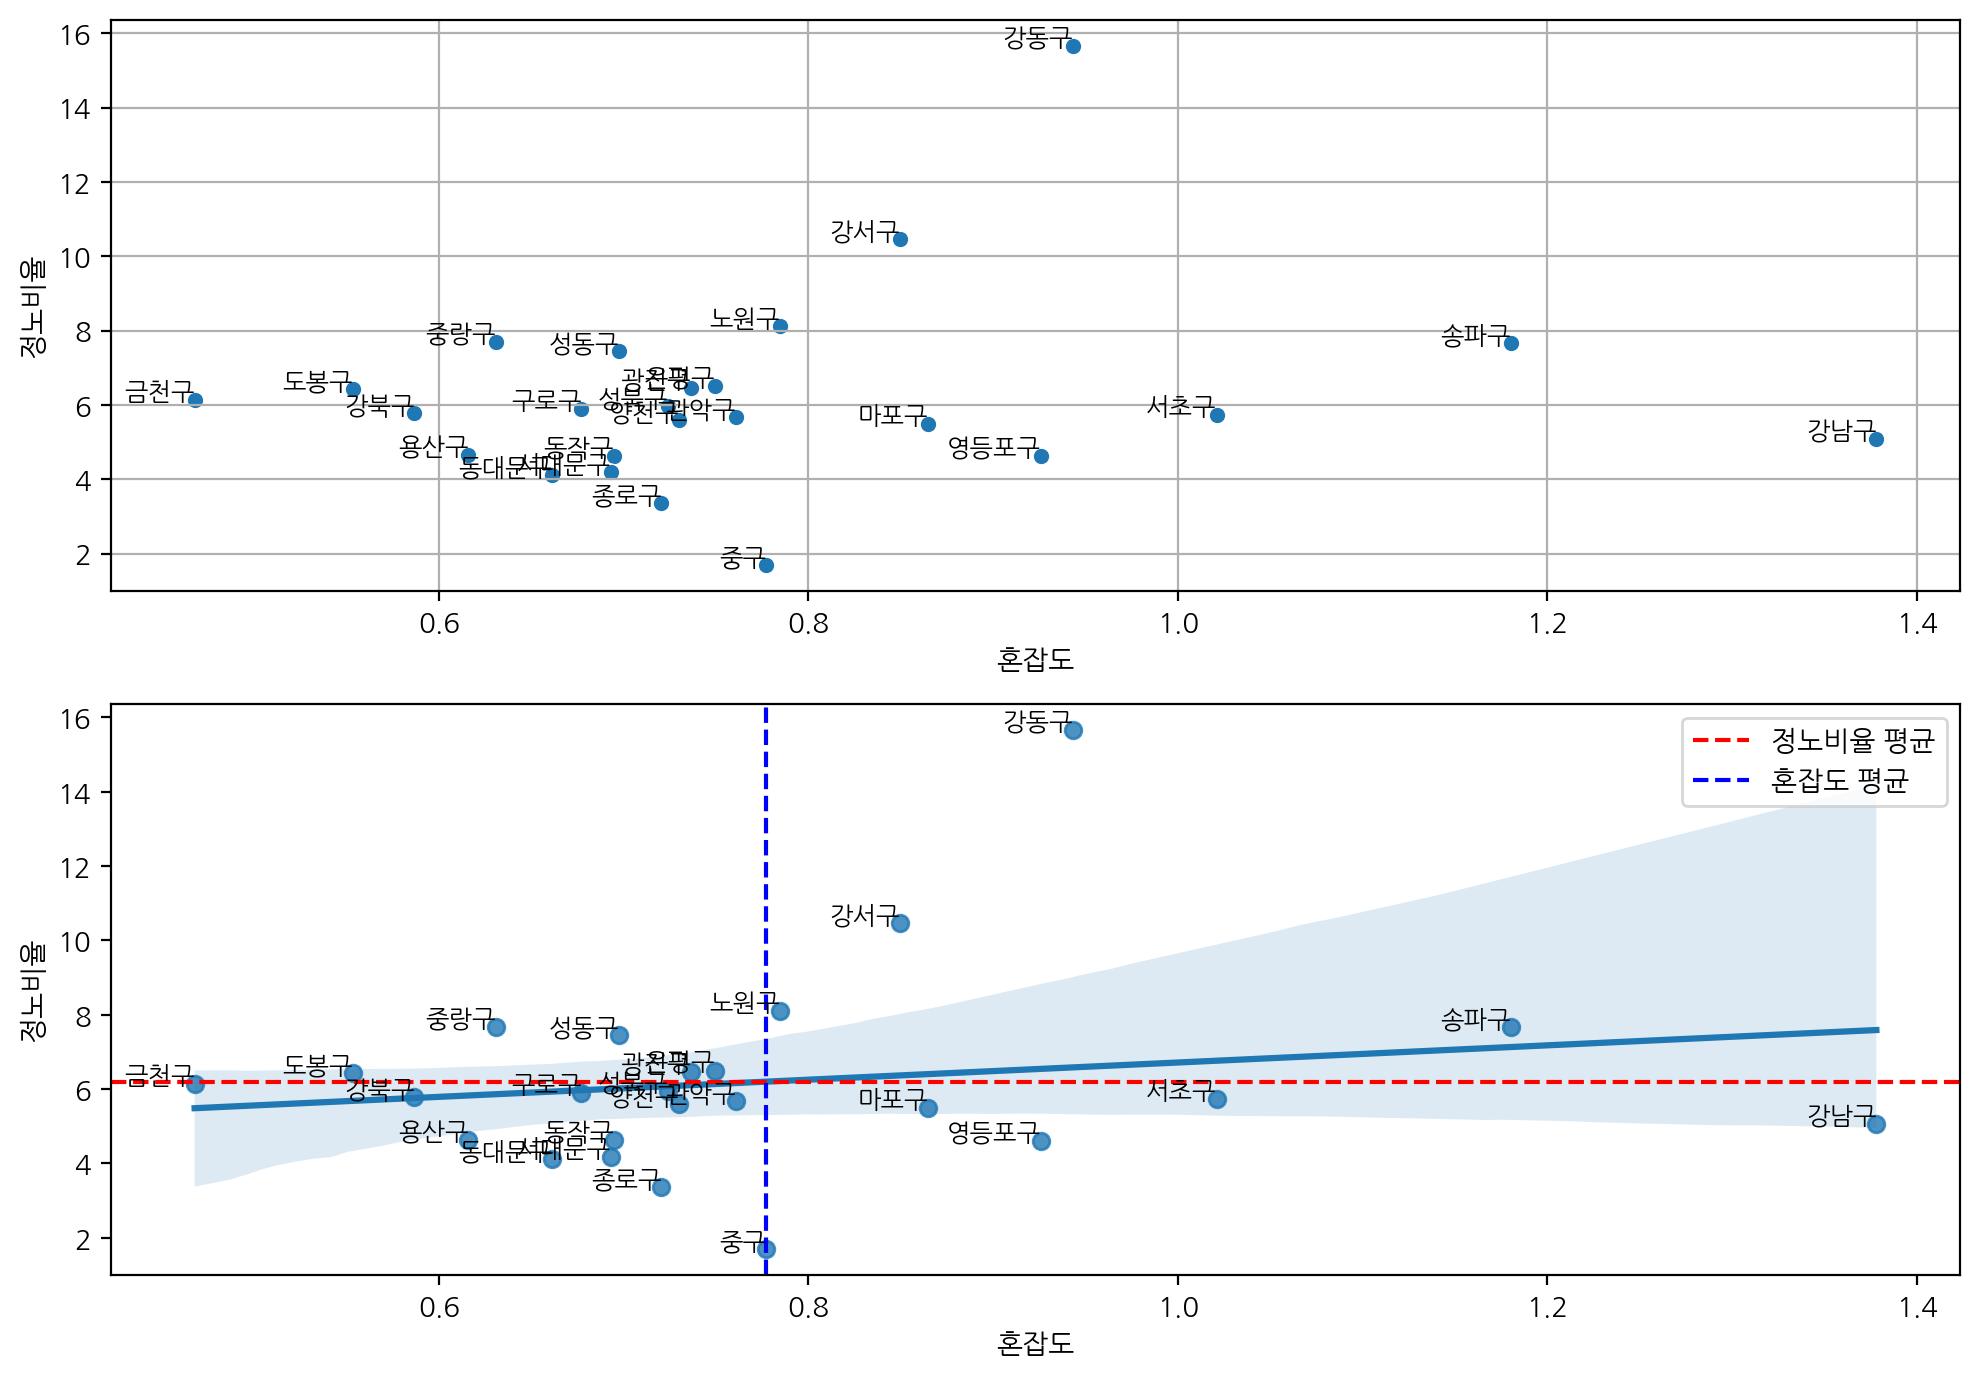

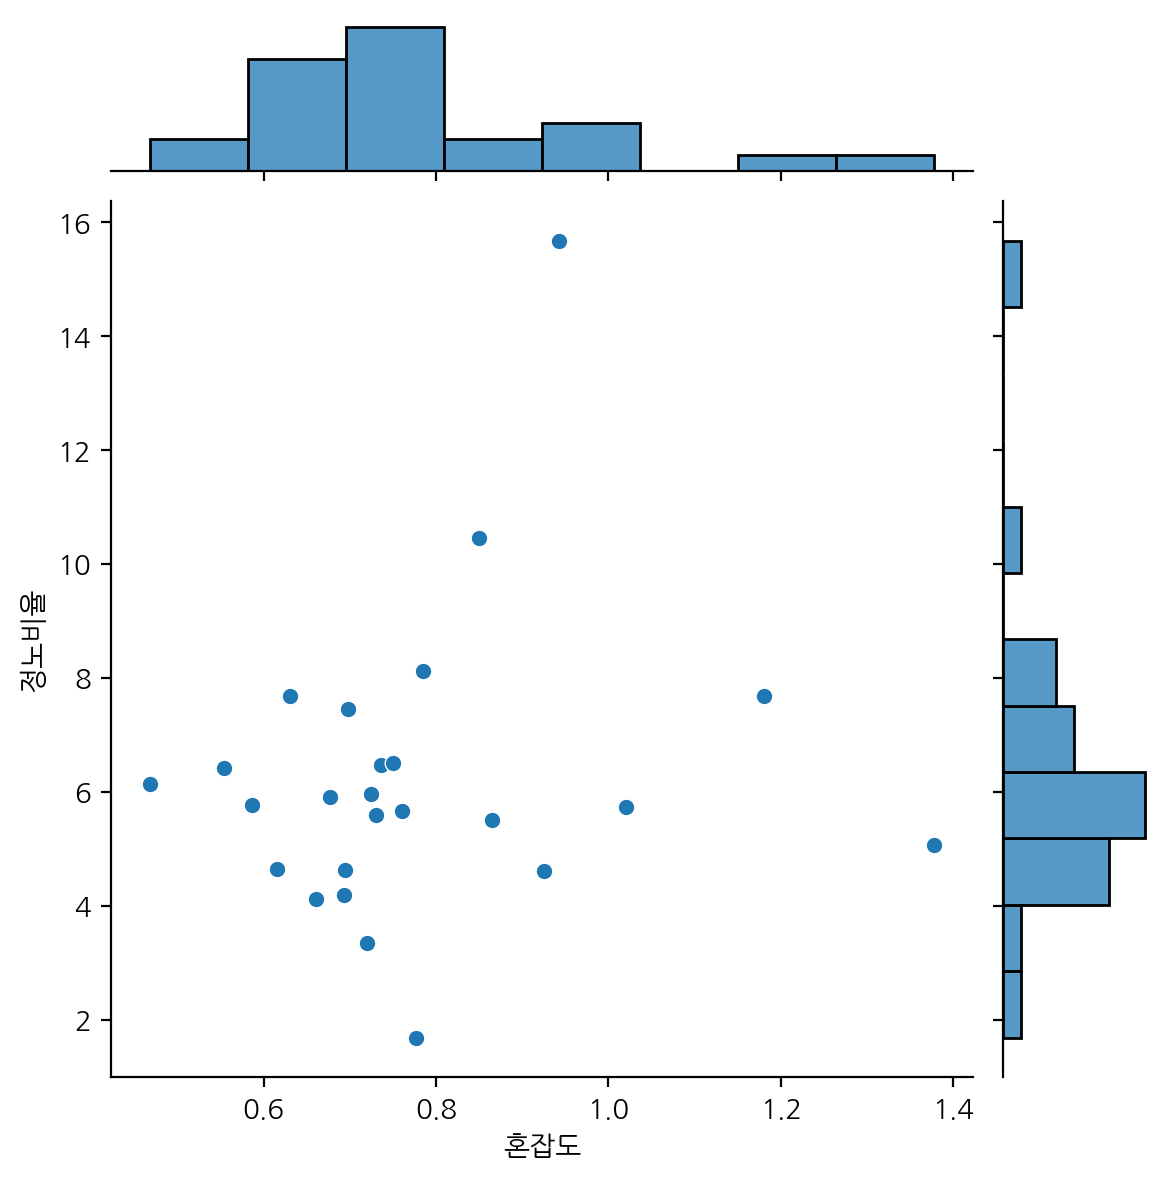

In [43]:
eda_1(df, '혼잡도', '정노비율')

### 2) 박연규 님

###  정류장 수가 많을 수록 총 이동시간이 오래 걸릴 것이다.

상관계수 : 0.4666392021169067, p-value : 0.018698419418334354
****************************************************************************************************


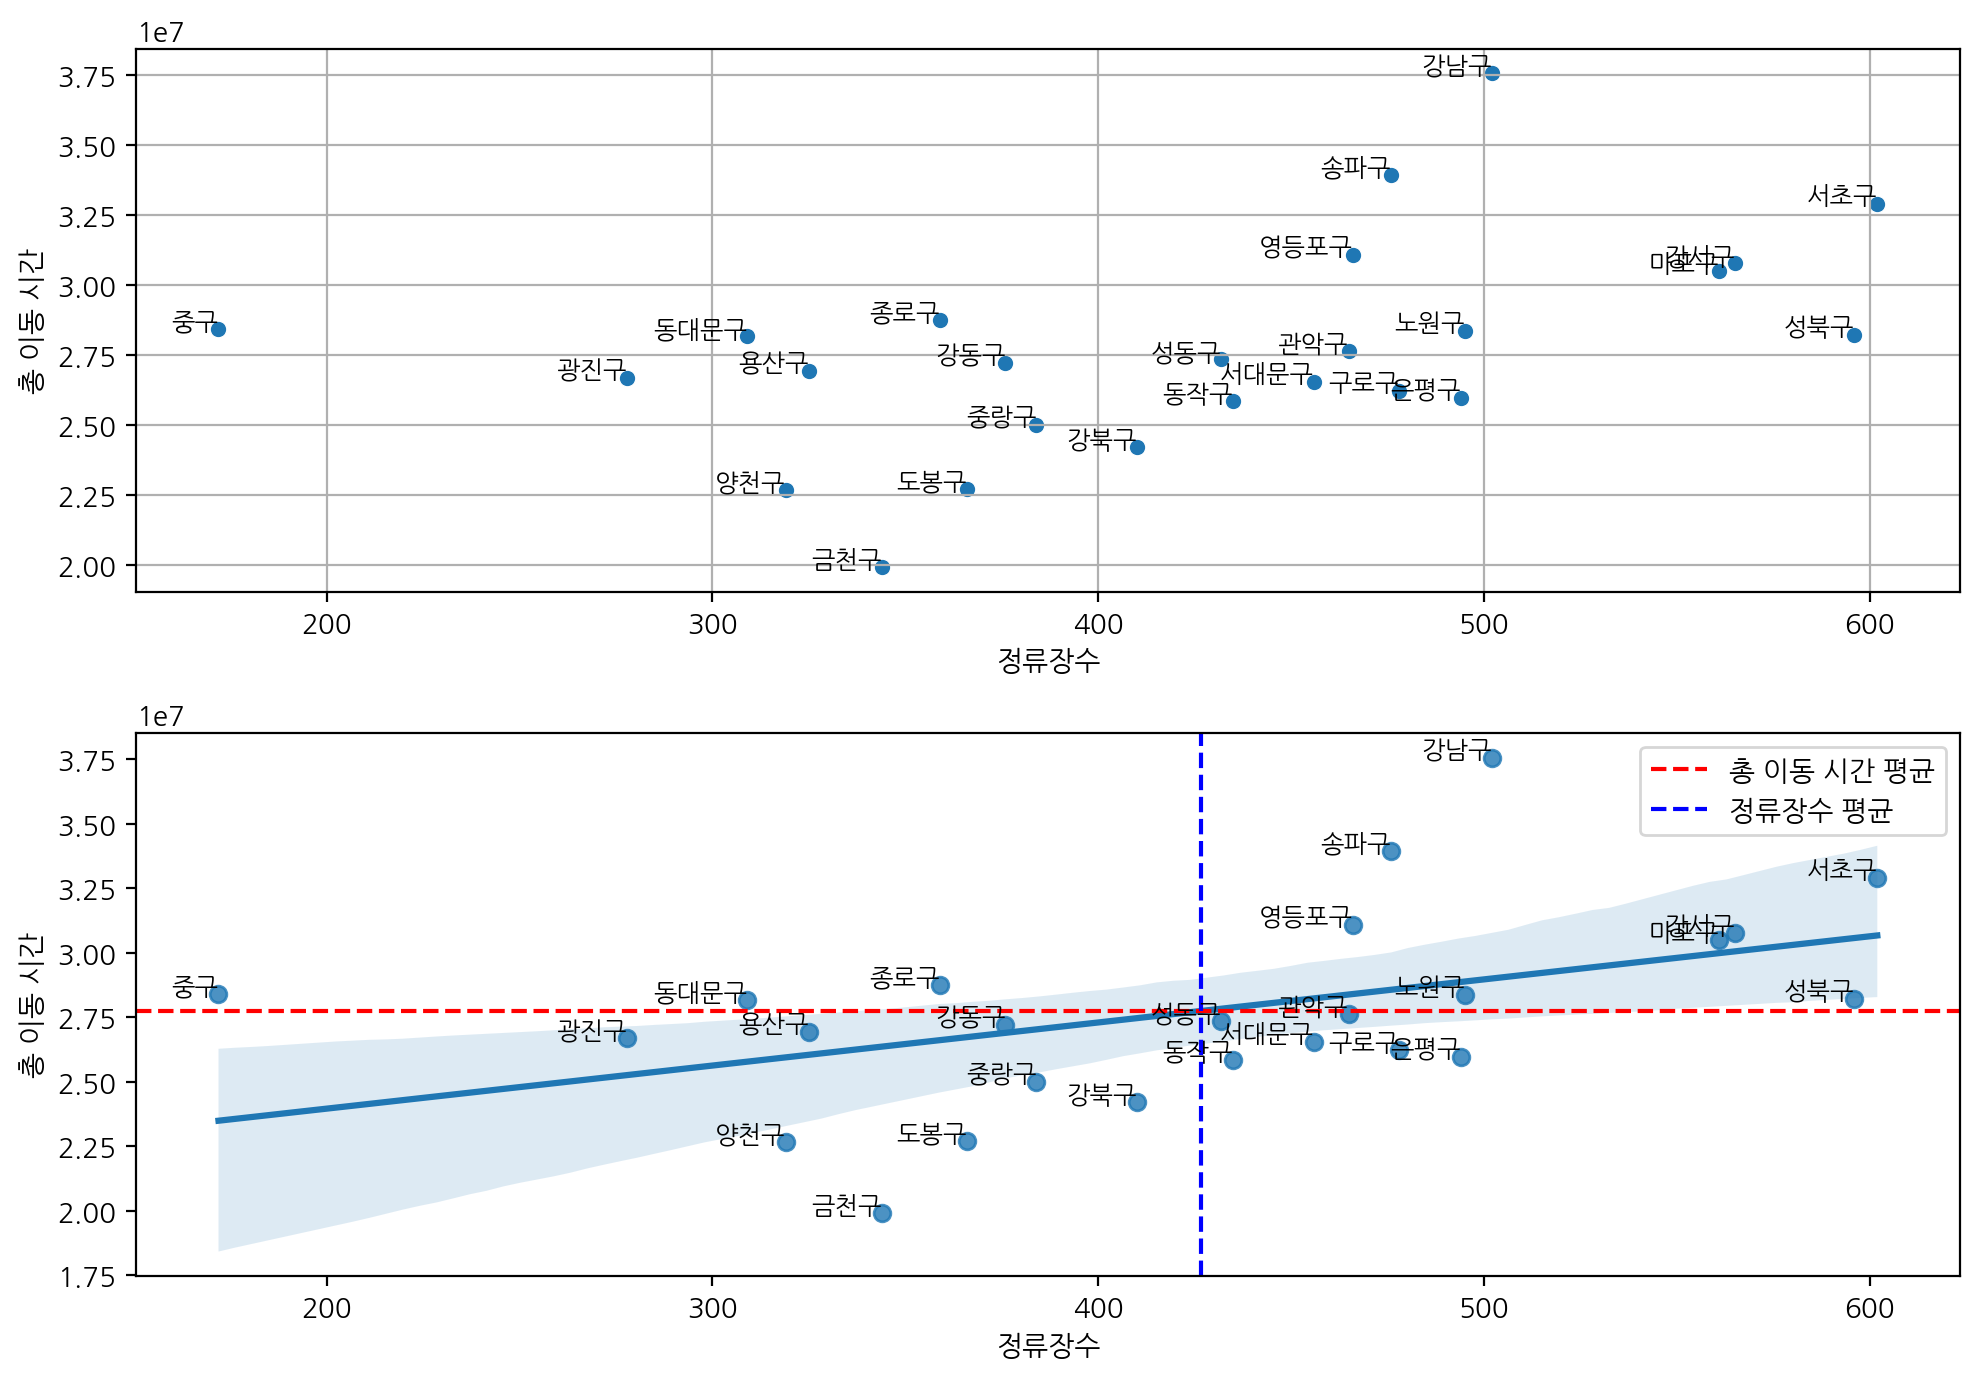

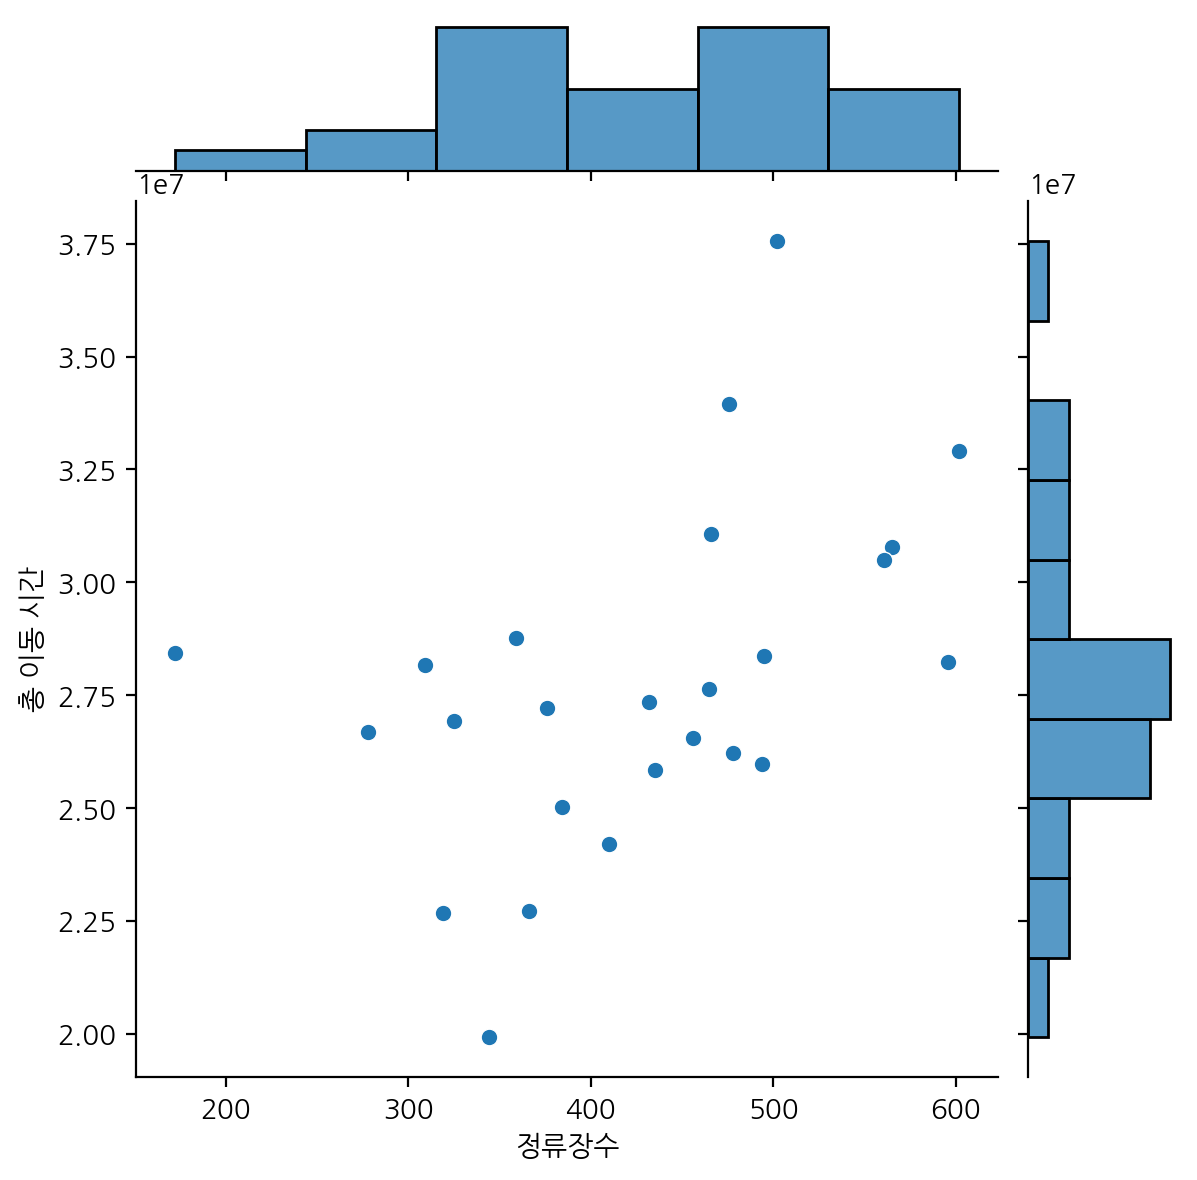

In [45]:
eda_1(df,'정류장수','총 이동 시간')

### 업종합계가 클 수록 총 이동인구는 많을 것이다.

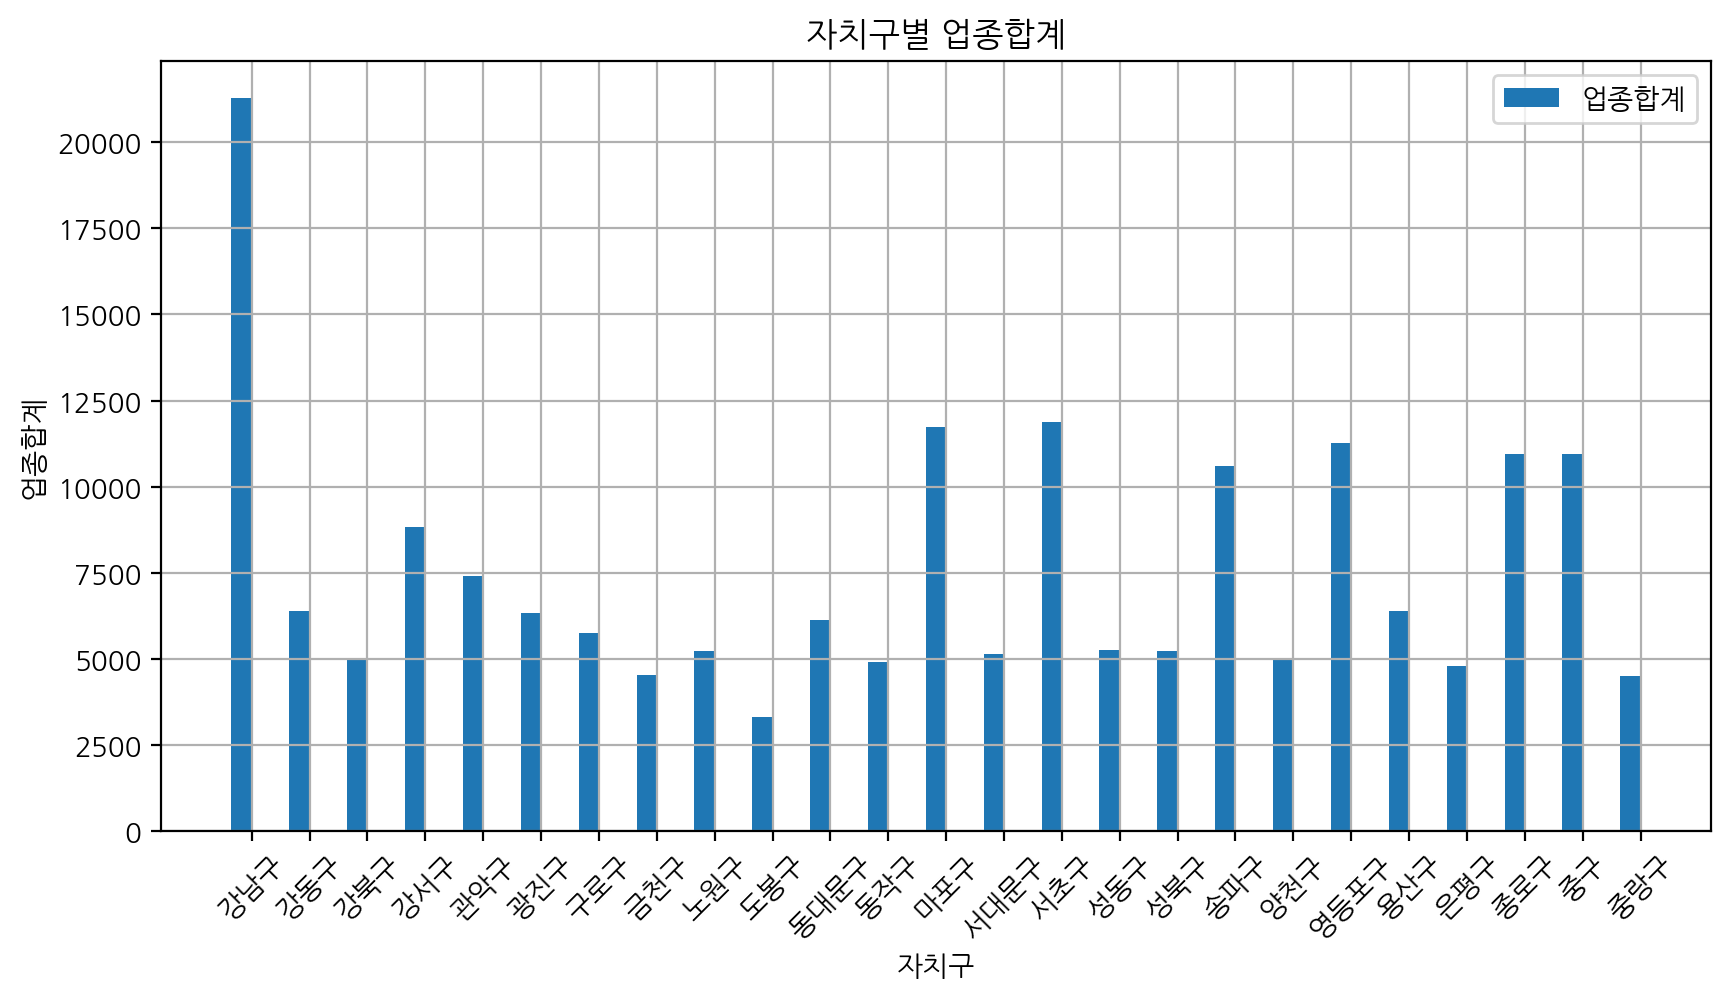

In [47]:
tmp = df.copy()
tmp['업종합계'] = tmp['한식 일반 음식점업'] + tmp['커피전문점'] + tmp['기타주점업']
show_bar_1(tmp,'자치구','업종합계')

상관계수 : 0.8813477563009332, p-value : 5.982878863724e-09
****************************************************************************************************


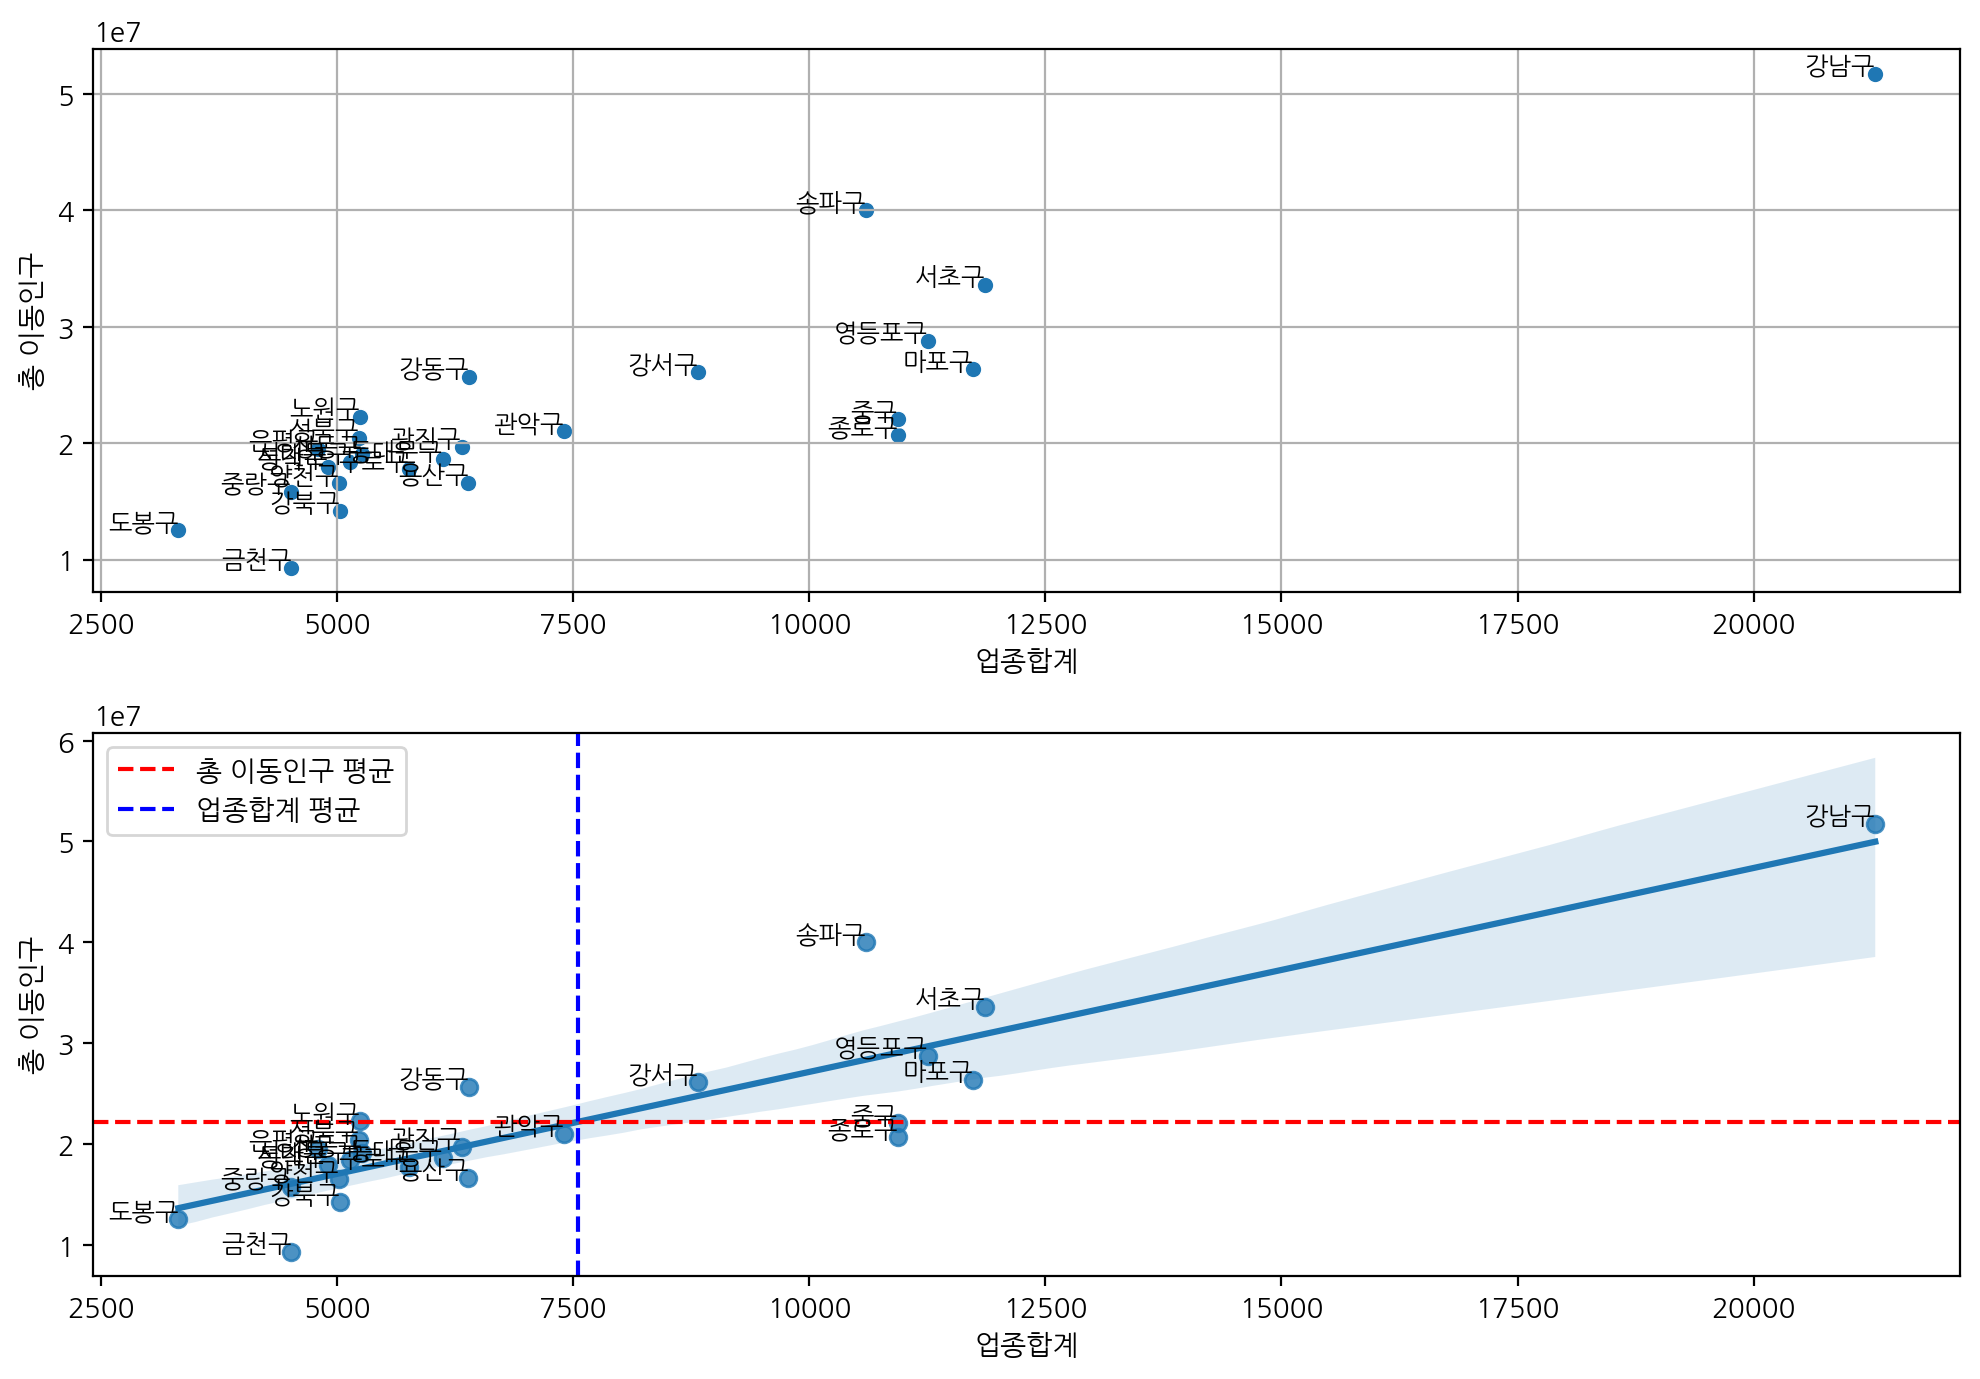

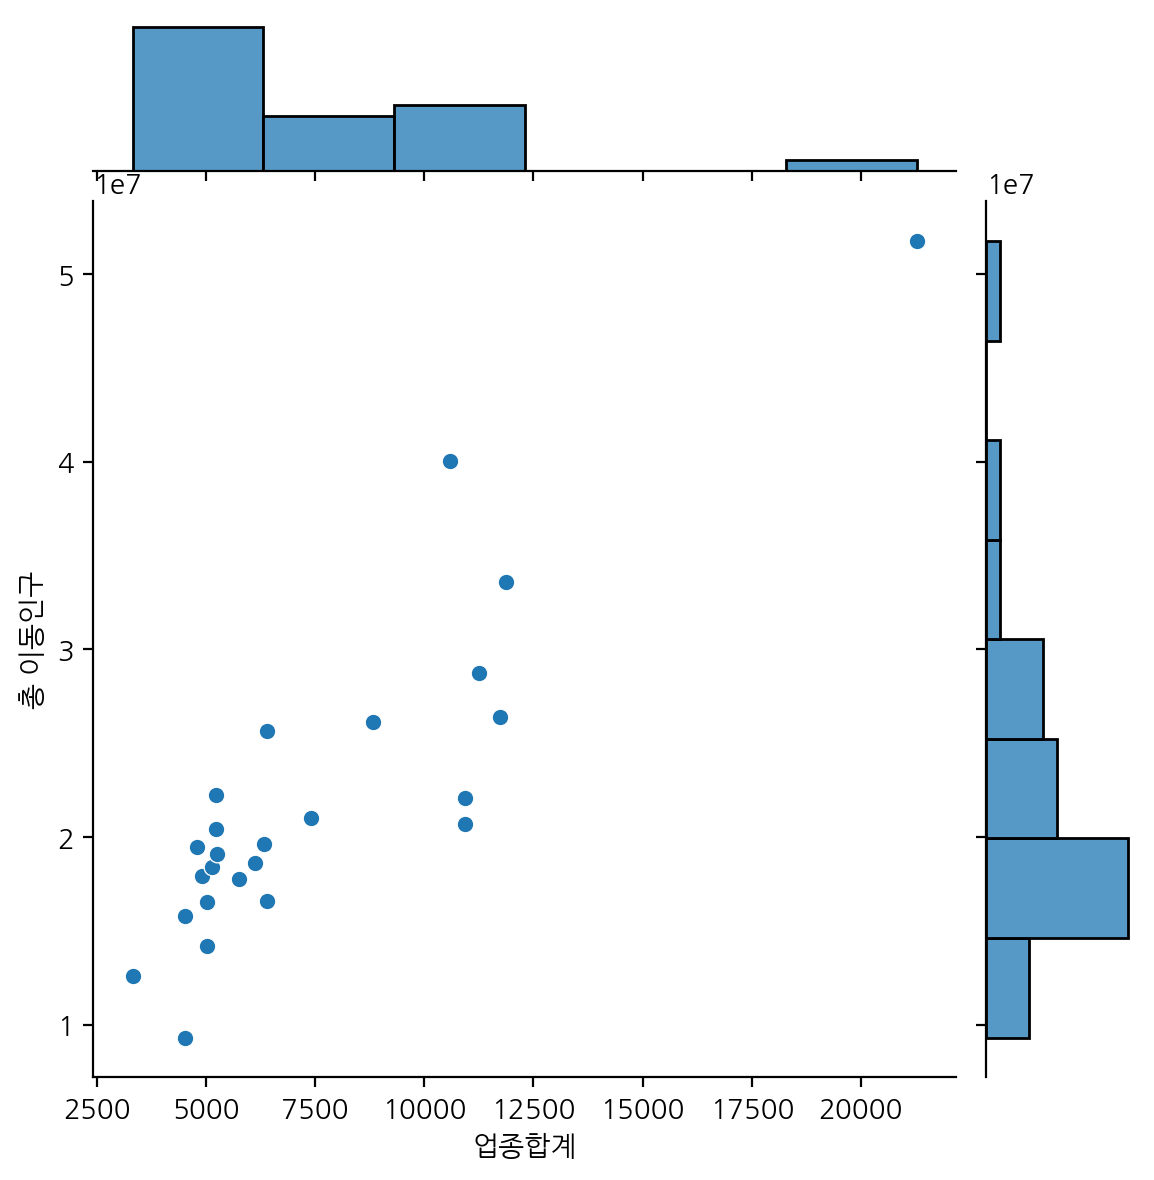

In [49]:
eda_1(tmp,'업종합계','총 이동인구')

- 업종합계(종사자) 수가 낮은데 이동 인구가 큰 경우 노선을 확충할 필요가 있다. 
- 강서구와 송파구는 노선 추가가 필요해보인다.

따라서 중구,동대문구,종로구, 강동구에 대중 교통 수요가 있으며 버스노선 확충이 필요하다.

### 3) 유찬혁 님

### 노선당 승차 및 하차 승객 수 계산하여 총 승객수가 가장 높은 자치구의 노선을 설치해야한다.

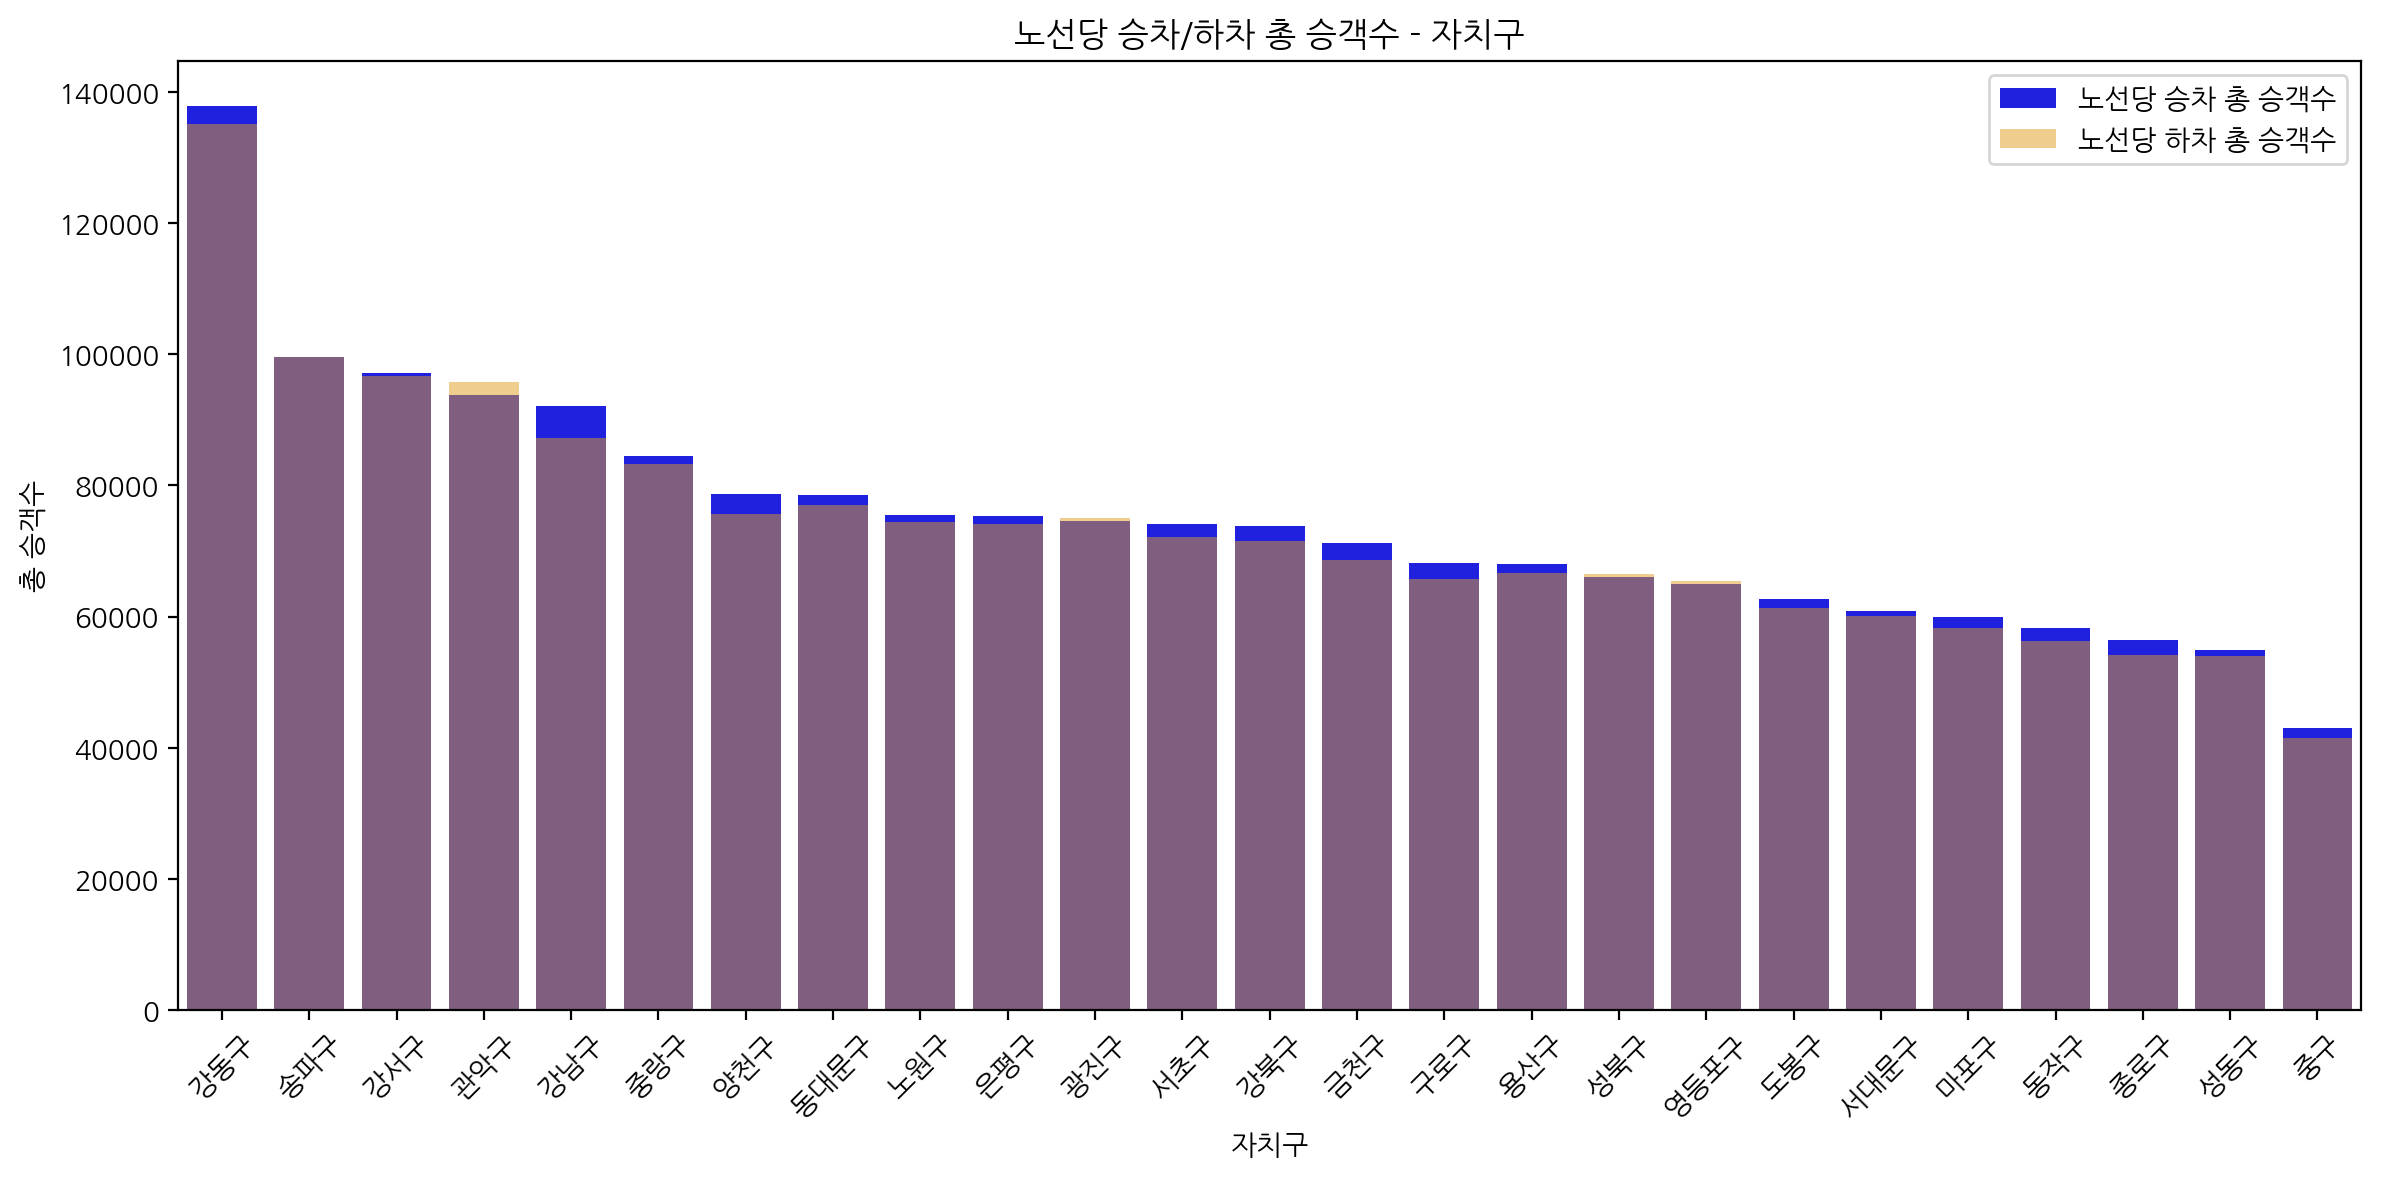

노선을 늘리는 것이 가장 효과적인 자치구 및 등수:
강동구: 1등
송파구: 2등
강서구: 3등
관악구: 4등
강남구: 5등
중랑구: 6등
양천구: 7등
동대문구: 8등
노원구: 9등
은평구: 10등
광진구: 11등
서초구: 12등
강북구: 13등
금천구: 14등
구로구: 15등
용산구: 16등
성북구: 17등
영등포구: 18등
도봉구: 19등
서대문구: 20등
마포구: 21등
동작구: 22등
종로구: 23등
성동구: 24등
중구: 25등


In [47]:
# 노선당 승차 및 하차 승객 수 계산
df['노선당_승차총승객수'] = df['승차총승객수'] / df['노선수']
df['노선당_하차총승객수'] = df['하차총승객수'] / df['노선수']

best_district = df[['자치구', '노선당_승차총승객수', '노선당_하차총승객수']].sort_values(by=['노선당_승차총승객수', '노선당_하차총승객수'], ascending=False)

# 혼합 그래프를 위한 데이터 준비
best_district['등수'] = range(1, len(best_district) + 1)  # 모든 자치구에 대한 등수 추가

plt.figure(figsize=(12, 6))
sns.barplot(x='자치구', y='노선당_승차총승객수', data=best_district, color='blue', label='노선당 승차 총 승객수')
sns.barplot(x='자치구', y='노선당_하차총승객수', data=best_district, color='orange', label='노선당 하차 총 승객수', alpha=0.5)

plt.title('노선당 승차/하차 총 승객수 - 자치구')
plt.xlabel('자치구')
plt.ylabel('총 승객수')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

# 모든 자치구 및 등수 출력
print("노선을 늘리는 것이 가장 효과적인 자치구 및 등수:")
for index, row in best_district.iterrows():
    print(f"{row['자치구']}: {row['등수']}등")

### 혼잡도(총 이동 인구/총 이동 시간)에 따라 노선을 설치해야한다.

In [216]:
# 혼잡도 열을 기준으로 등수 계산 (내림차순)
# df['혼잡도'] = df['총 이동인구'] / df['총 이동 시간']

df['등수'] = df['혼잡도'].rank(method='min', ascending=False)

# 혼잡도를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='혼잡도', ascending=False)

# 자치구 이름 확인용
df_sorted.head(5) 

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,한식 일반 음식점업,커피전문점,기타주점업,남자,여자,합계,정노비율,혼잡도,등수
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,11486,7273,2528,268993,293762,562755,5.070707,1.378088,1.0
17,송파구,476,62,6172655,6176516,107.372930,107.440092,70.606433,83.345366,33944325,40068617.94,5760,3372,1469,315700,342660,658360,7.677419,1.180422,2.0
14,서초구,602,105,7776846,7575195,125.081964,121.838630,63.284077,64.608088,32910441,33598983.96,6712,3897,1255,196114,216033,412147,5.733333,1.020922,3.0
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,3388,1660,1349,228197,239705,467902,15.666667,0.943101,4.0
19,영등포구,466,101,6555386,6611792,125.327611,126.405995,60.477100,55.985863,31067449,28760273.86,6476,3295,1489,195211,202610,397821,4.613861,0.925737,5.0


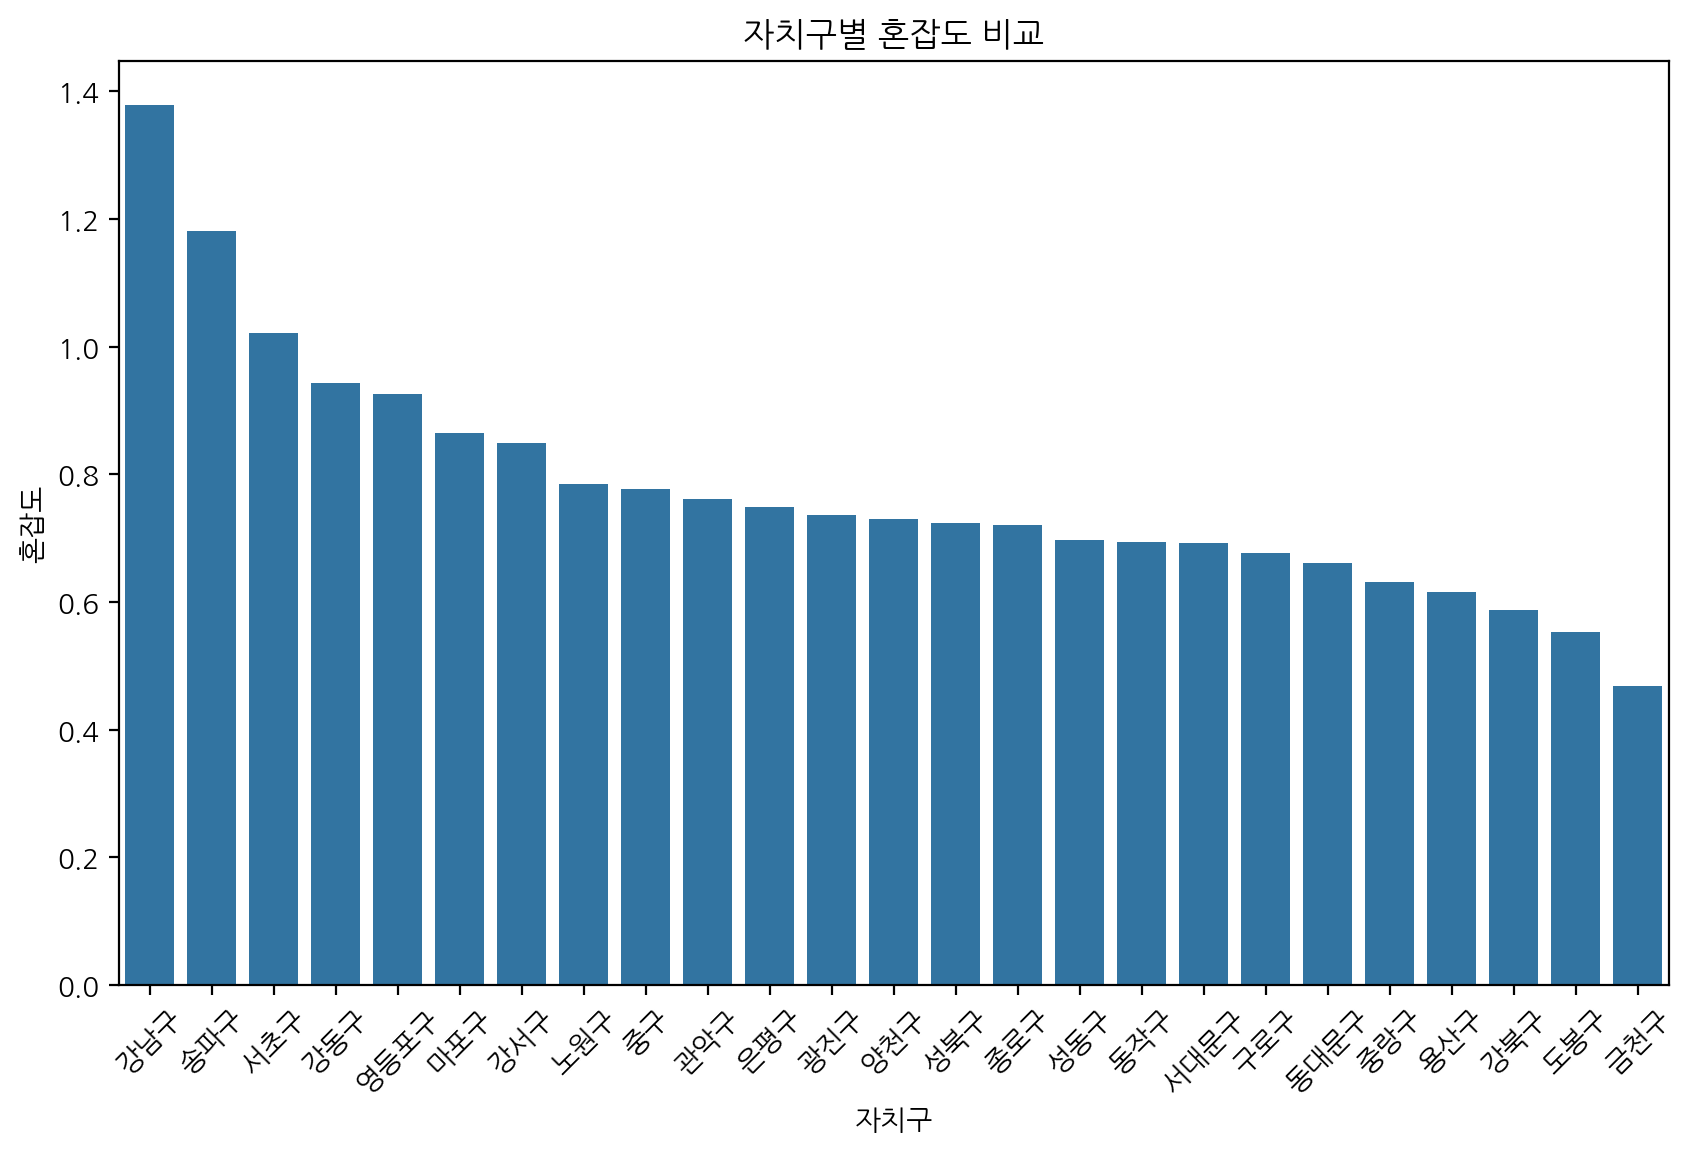

자치구별 혼잡도 및 등수:
0: 1등
17: 2등
14: 3등
1: 4등
19: 5등
12: 6등
3: 7등
8: 8등
23: 9등
4: 10등
21: 11등
5: 12등
18: 13등
16: 14등
22: 15등
15: 16등
11: 17등
13: 18등
6: 19등
10: 20등
24: 21등
20: 22등
2: 23등
9: 24등
7: 25등


In [210]:
# 혼잡도 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='혼잡도', data=df_sorted)
plt.title('자치구별 혼잡도 비교')
plt.xlabel('자치구')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.show()

# 각 자치구의 혼잡도 및 등수 출력
print("자치구별 혼잡도 및 등수:")
for i in range(df_sorted.shape[0]):
    # '자치구'가 아닌 다른 열 이름을 확인
    print(f"{df_sorted.index[i]}: {int(df_sorted['등수'].iloc[i])}등")

### 인구수가 많은 곳에 노선을 설치해야한다.

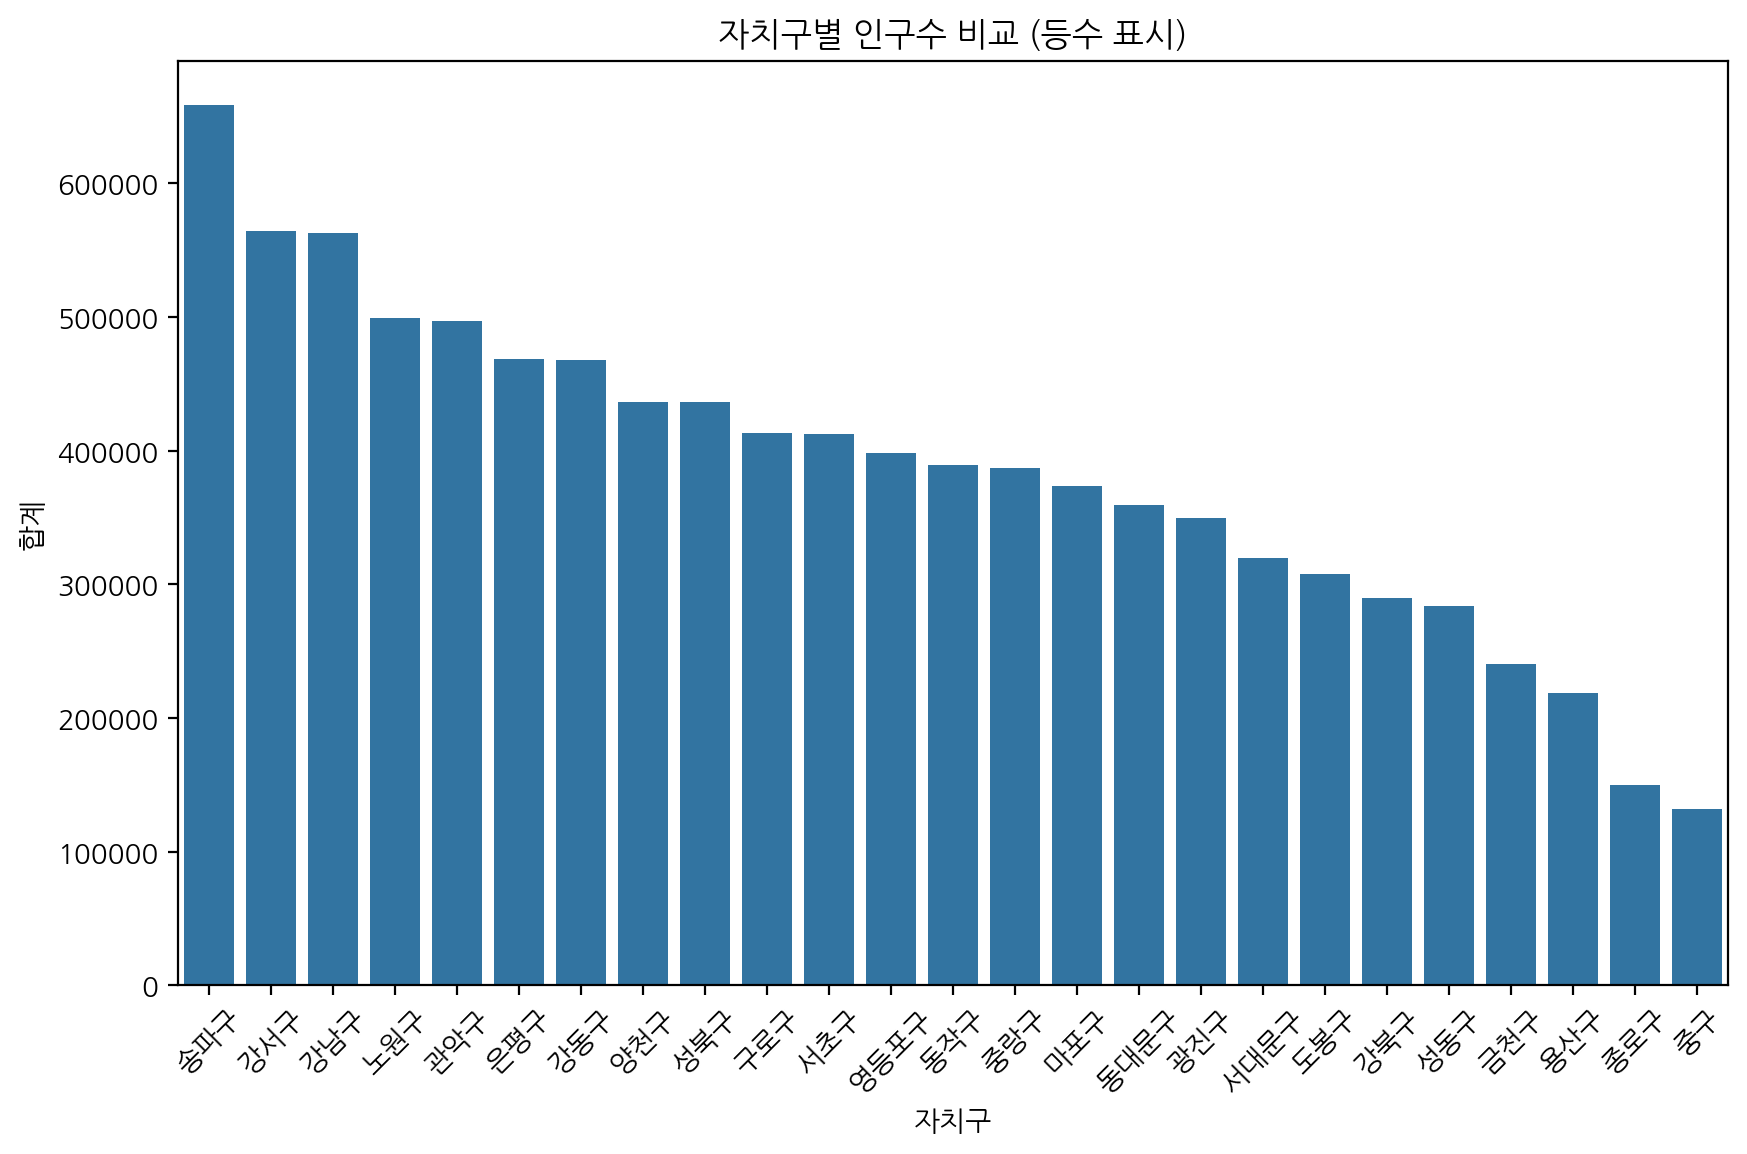

자치구별 인구수 및 등수:
송파구: 1등
강서구: 2등
강남구: 3등
노원구: 4등
관악구: 5등
은평구: 6등
강동구: 7등
양천구: 8등
성북구: 9등
구로구: 10등
서초구: 11등
영등포구: 12등
동작구: 13등
중랑구: 14등
마포구: 15등
동대문구: 16등
광진구: 17등
서대문구: 18등
도봉구: 19등
강북구: 20등
성동구: 21등
금천구: 22등
용산구: 23등
종로구: 24등
중구: 25등


In [132]:
# 인구수를 기준으로 자치구별 등수 계산 (내림차순)
df['등수'] = df['합계'].rank(method='min', ascending=False)

# 등수를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='합계', ascending=False)

# 혼잡도 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='합계', data=df_sorted)
plt.title('자치구별 인구수 비교 (등수 표시)')
plt.xlabel('자치구')
plt.ylabel('합계')
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

# 각 자치구의 인구수와 등수 출력
print("자치구별 인구수 및 등수:")
for i in range(df_sorted.shape[0]):
    # '자치구'가 아닌 다른 열 이름을 확인
    print(f"{df_sorted.index[i]}: {int(df_sorted['등수'].iloc[i])}등")

### 3) 유찬혁 님

### 노선당 승차 및 하차 승객 수 계산하여 총 승객수가 가장 높은 자치구의 노선을 설치해야한다.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
노선당_승차총승객수,25.0,74800.573529,19051.762695,42985.921569,62731.789474,73865.295775,78661.754386,137774.5


<< 그래프 >>


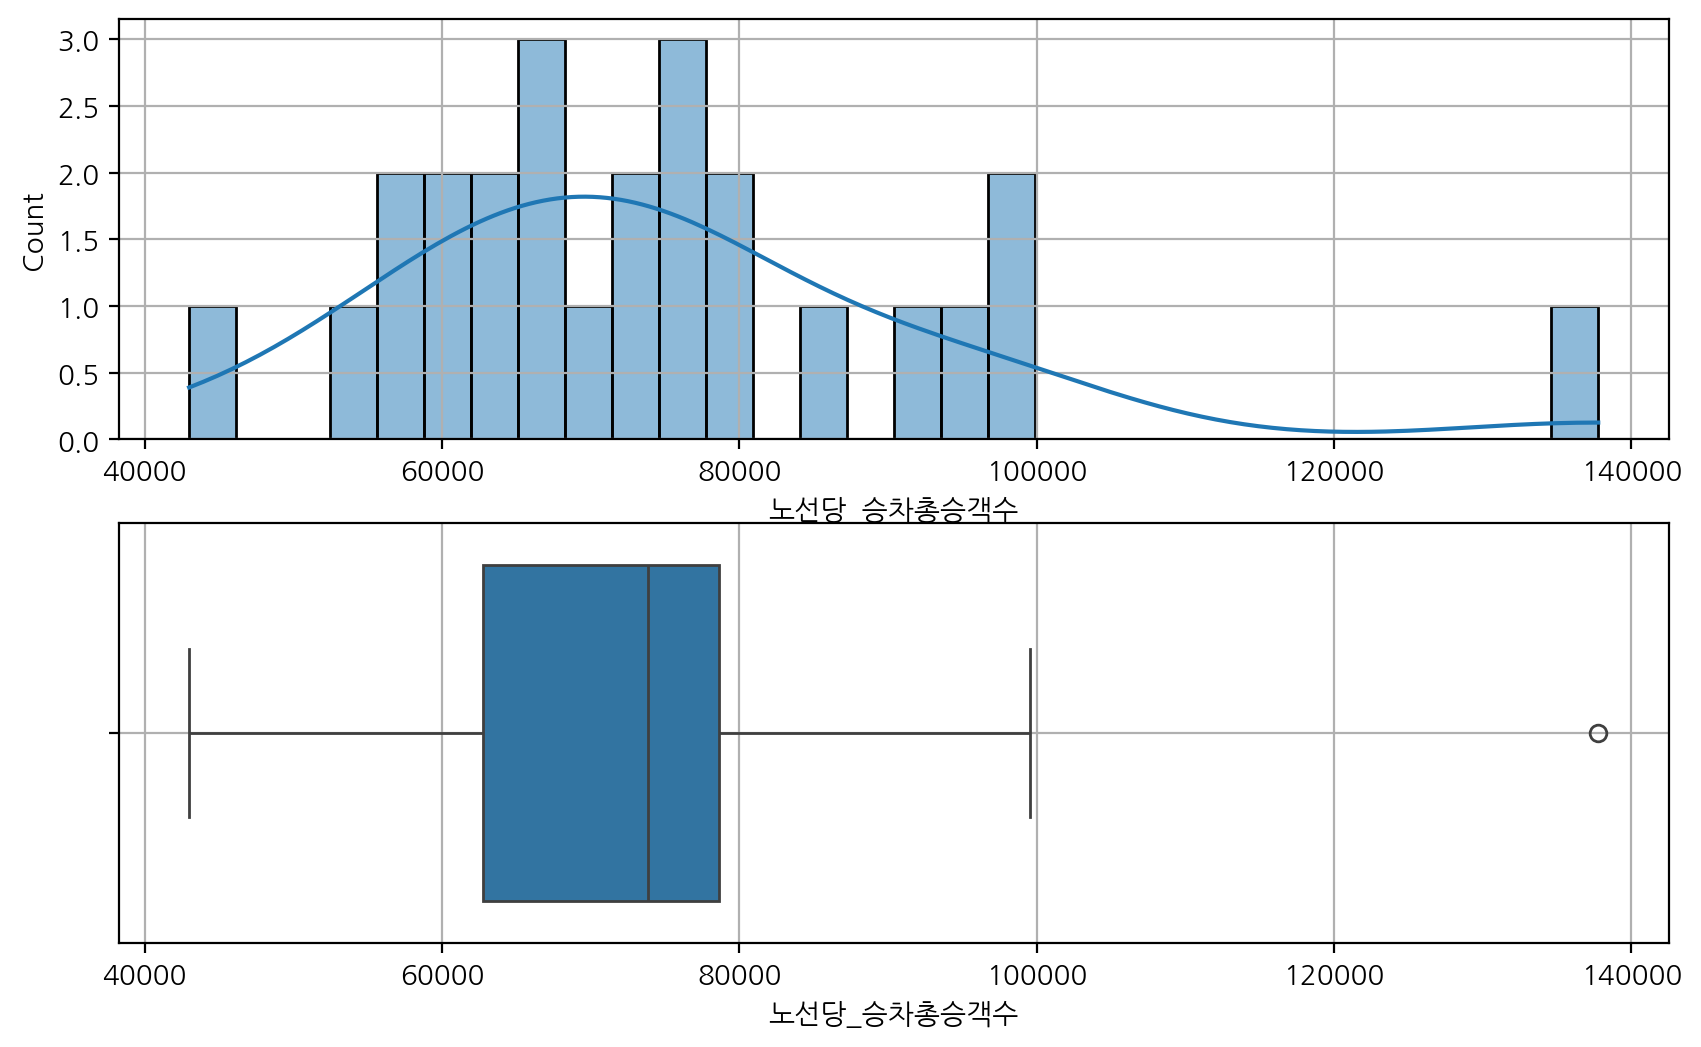

In [136]:
eda_1_num(best_district, '노선당_승차총승객수')

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
노선당_하차총승객수,25.0,73443.964476,19036.12956,41556.960784,61281.77193,71507.619718,76945.066667,135120.875


<< 그래프 >>


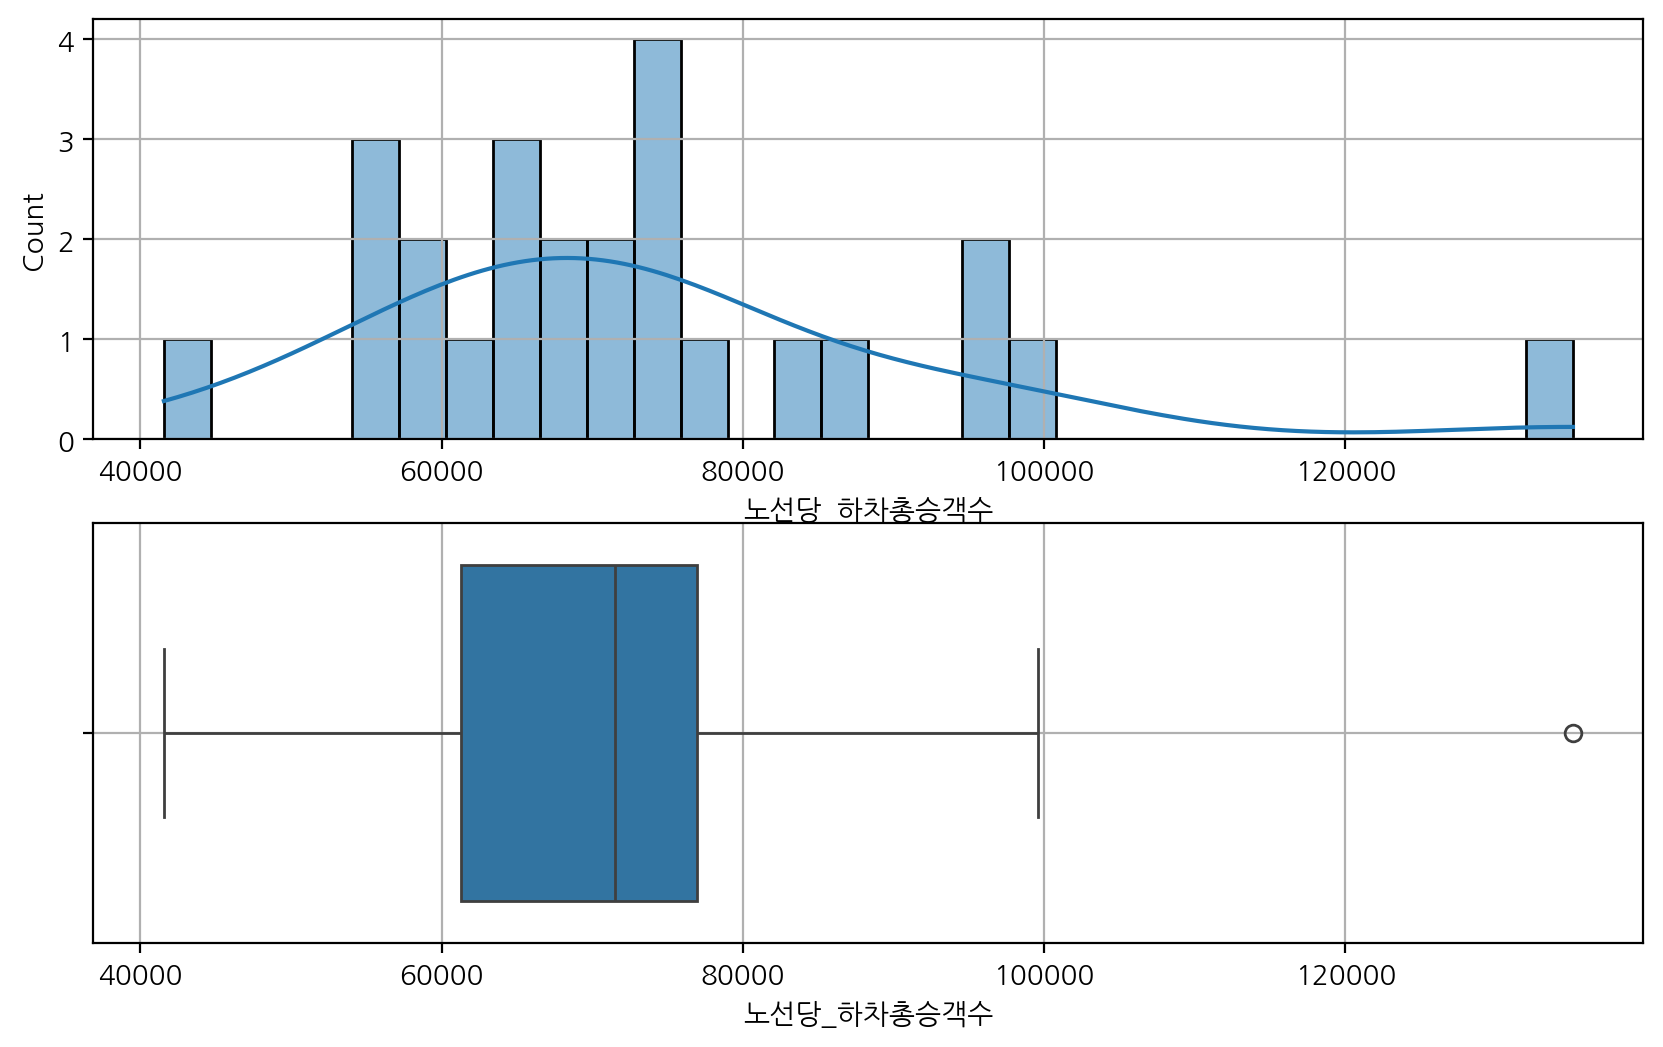

In [138]:
eda_1_num(best_district, '노선당_하차총승객수')

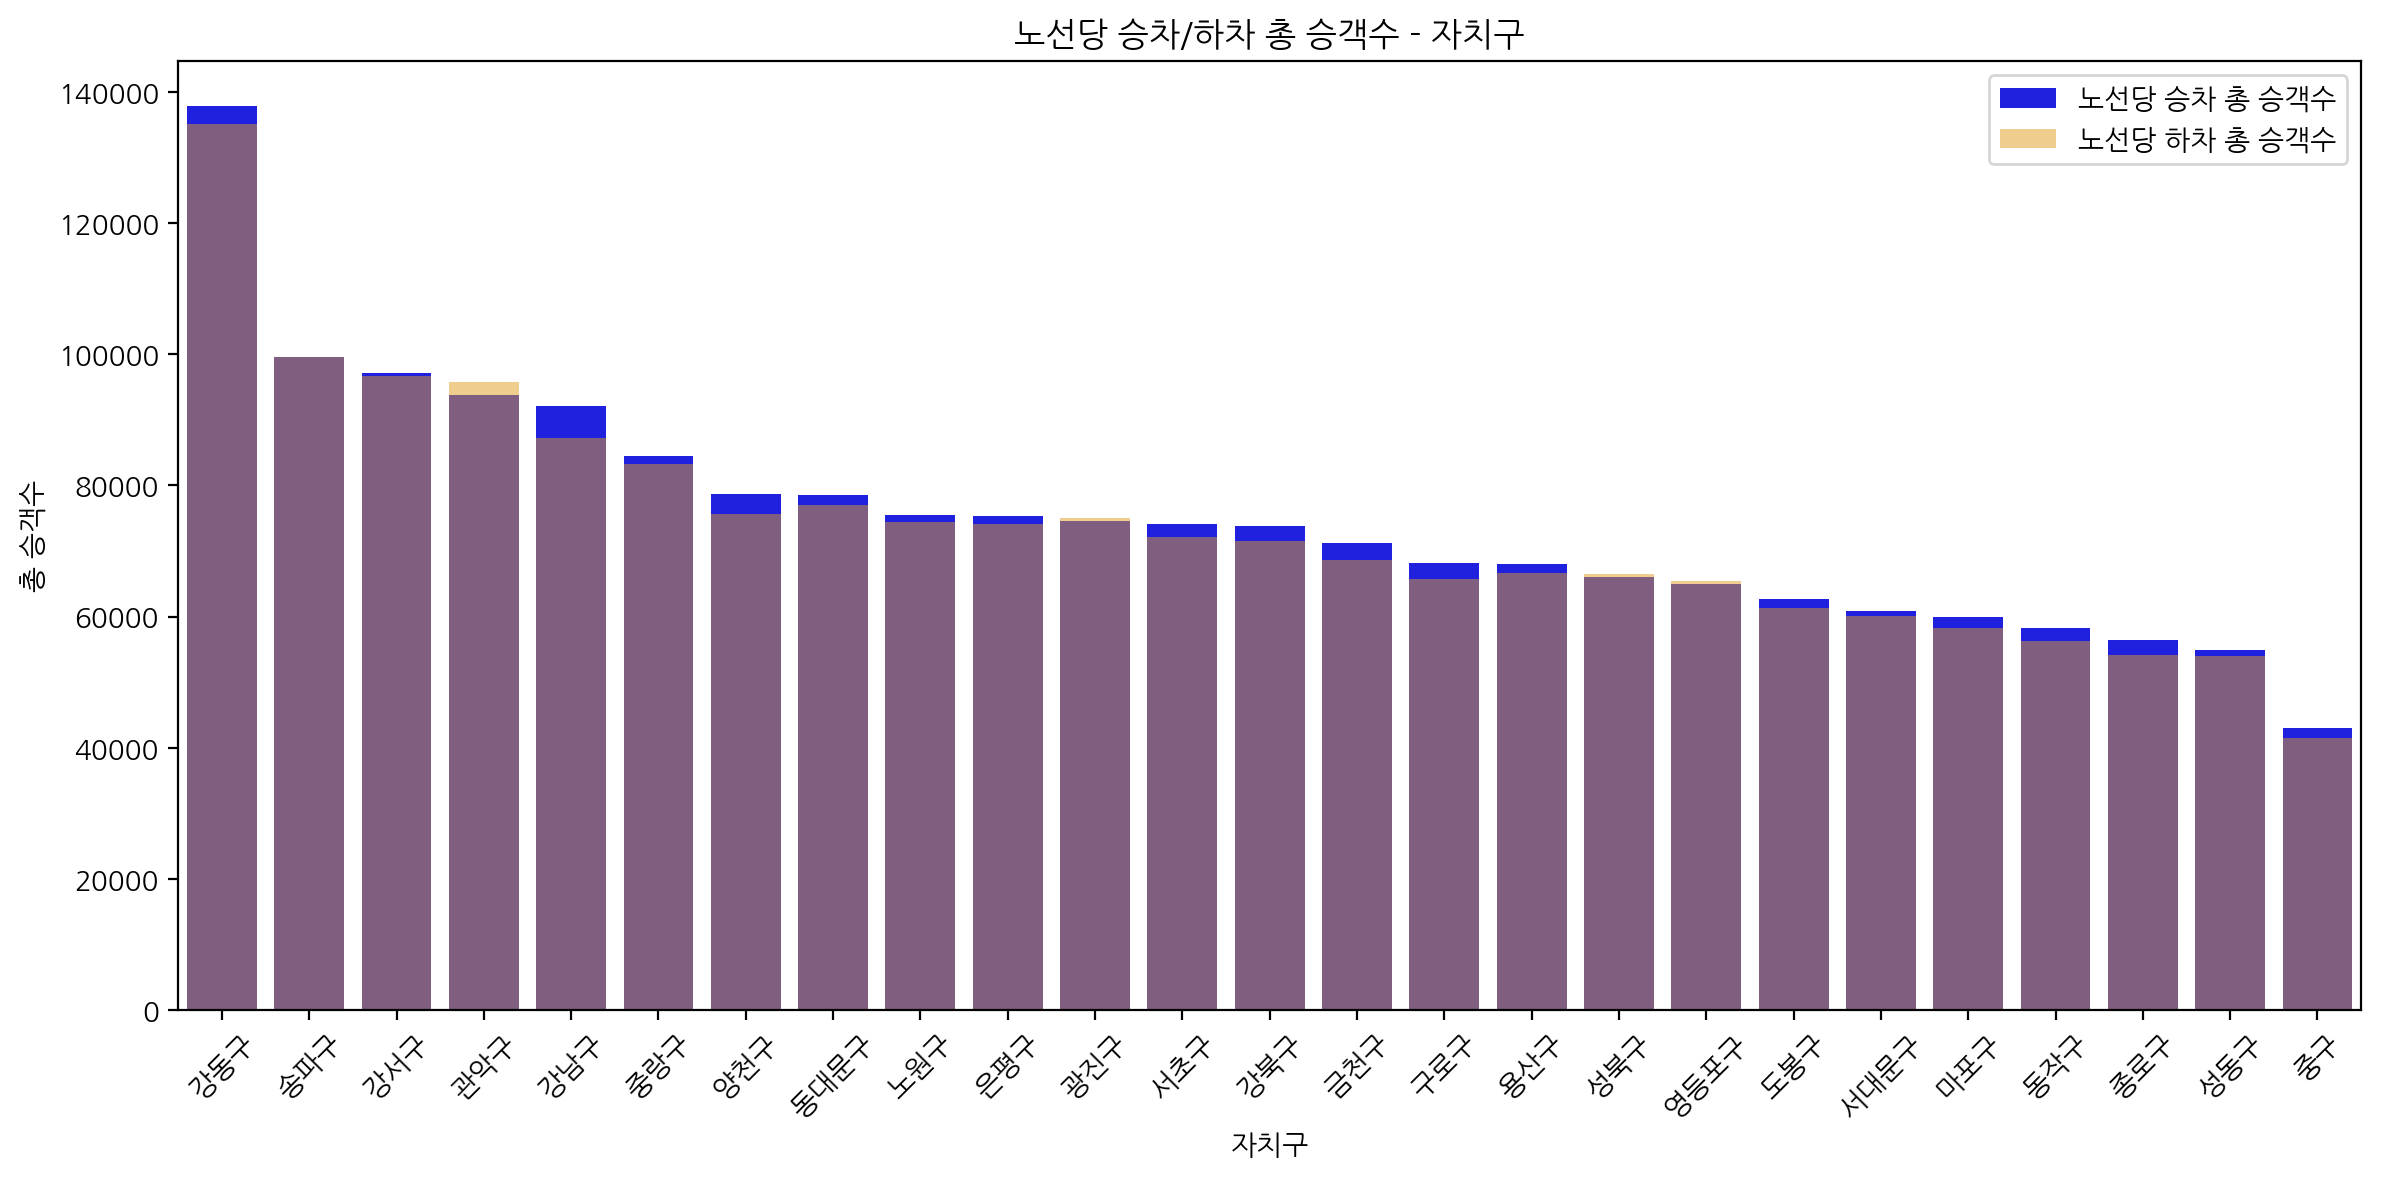

노선을 늘리는 것이 가장 효과적인 자치구 및 등수:
강동구: 1등
송파구: 2등
강서구: 3등
관악구: 4등
강남구: 5등
중랑구: 6등
양천구: 7등
동대문구: 8등
노원구: 9등
은평구: 10등
광진구: 11등
서초구: 12등
강북구: 13등
금천구: 14등
구로구: 15등
용산구: 16등
성북구: 17등
영등포구: 18등
도봉구: 19등
서대문구: 20등
마포구: 21등
동작구: 22등
종로구: 23등
성동구: 24등
중구: 25등


In [66]:
# 노선당 승차 및 하차 승객 수 계산
df['노선당_승차총승객수'] = df['승차총승객수'] / df['노선수']
df['노선당_하차총승객수'] = df['하차총승객수'] / df['노선수']

best_district = df[['자치구', '노선당_승차총승객수', '노선당_하차총승객수']].sort_values(by=['노선당_승차총승객수', '노선당_하차총승객수'], ascending=False)

# 혼합 그래프를 위한 데이터 준비
best_district['등수'] = range(1, len(best_district) + 1)  # 모든 자치구에 대한 등수 추가

plt.figure(figsize=(12, 6))
sns.barplot(x='자치구', y='노선당_승차총승객수', data=best_district, color='blue', label='노선당 승차 총 승객수')
sns.barplot(x='자치구', y='노선당_하차총승객수', data=best_district, color='orange', label='노선당 하차 총 승객수', alpha=0.5)

plt.title('노선당 승차/하차 총 승객수 - 자치구')
plt.xlabel('자치구')
plt.ylabel('총 승객수')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

# 모든 자치구 및 등수 출력
print("노선을 늘리는 것이 가장 효과적인 자치구 및 등수:")
for index, row in best_district.iterrows():
    print(f"{row['자치구']}: {row['등수']}등")

### 혼잡도(총 이동 인구/총 이동 시간)에 따라 노선을 설치해야한다.

In [70]:
# 혼잡도 열을 기준으로 등수 계산 (내림차순)
# df['혼잡도'] = df['총 이동인구'] / df['총 이동 시간']

df['등수'] = df['혼잡도'].rank(method='min', ascending=False)

# 혼잡도를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='혼잡도', ascending=False)

# 자치구 이름 확인용
df_sorted.head(5) 

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,...,커피전문점,기타주점업,남자,여자,합계,정노비율,혼잡도,노선당_승차총승객수,노선당_하차총승객수,등수
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,...,7273,2528,268993,293762,562755,5.070707,1.378088,92050.717172,87276.292929,1.0
17,송파구,476,62,6172655,6176516,107.372930,107.440092,70.606433,83.345366,33944325,...,3372,1469,315700,342660,658360,7.677419,1.180422,99558.951613,99621.225806,2.0
14,서초구,602,105,7776846,7575195,125.081964,121.838630,63.284077,64.608088,32910441,...,3897,1255,196114,216033,412147,5.733333,1.020922,74065.200000,72144.714286,3.0
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,...,1660,1349,228197,239705,467902,15.666667,0.943101,137774.500000,135120.875000,4.0
19,영등포구,466,101,6555386,6611792,125.327611,126.405995,60.477100,55.985863,31067449,...,3295,1489,195211,202610,397821,4.613861,0.925737,64904.811881,65463.287129,5.0


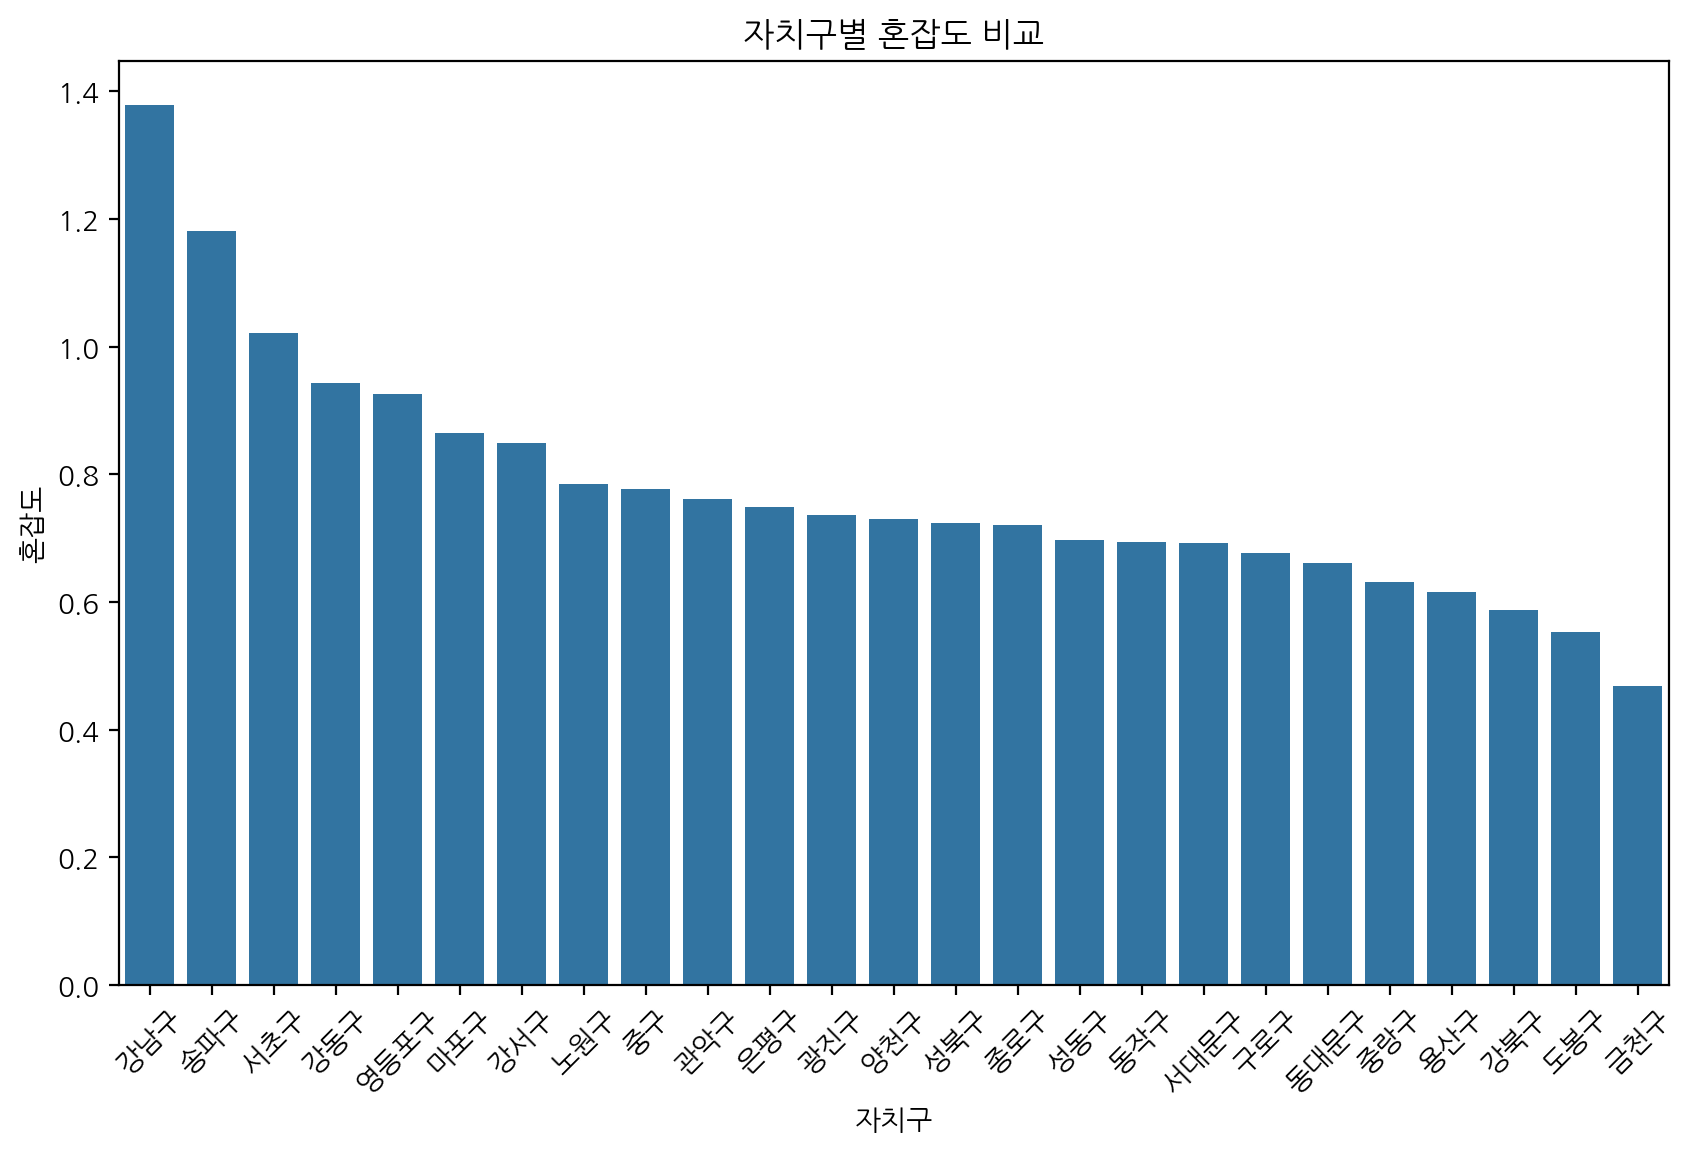

자치구별 혼잡도 및 등수:
0: 1등
17: 2등
14: 3등
1: 4등
19: 5등
12: 6등
3: 7등
8: 8등
23: 9등
4: 10등
21: 11등
5: 12등
18: 13등
16: 14등
22: 15등
15: 16등
11: 17등
13: 18등
6: 19등
10: 20등
24: 21등
20: 22등
2: 23등
9: 24등
7: 25등


In [72]:
# 혼잡도 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='혼잡도', data=df_sorted)
plt.title('자치구별 혼잡도 비교')
plt.xlabel('자치구')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.show()

# 각 자치구의 혼잡도 및 등수 출력
print("자치구별 혼잡도 및 등수:")
for i in range(df_sorted.shape[0]):
    # '자치구'가 아닌 다른 열 이름을 확인
    print(f"{df_sorted.index[i]}: {int(df_sorted['등수'].iloc[i])}등")

### 인구수가 많은 곳에 노선을 설치해야한다.

In [131]:
# 인구수를 기준으로 자치구별 등수 계산 (내림차순)
df['등수'] = df['합계'].rank(method='min', ascending=False)

# 등수를 기준으로 데이터프레임 정렬
df_sorted = df.sort_values(by='합계', ascending=False)

# 자치구 이름 확인용
df_sorted.head(5)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,...,커피전문점,기타주점업,남자,여자,합계,정노비율,혼잡도,노선당_승차총승객수,노선당_하차총승객수,등수
17,송파구,476,62,6172655,6176516,107.372930,107.440092,70.606433,83.345366,33944325,...,3372,1469,315700,342660,658360,7.677419,1.180422,99558.951613,99621.225806,1.0
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,...,2530,1709,270025,294460,564485,10.462963,0.849371,97122.500000,96629.648148,2.0
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,...,7273,2528,268993,293762,562755,5.070707,1.378088,92050.717172,87276.292929,3.0
8,노원구,495,61,4609496,4535591,88.736303,87.313576,66.705984,52.344090,28370322,...,1748,844,239118,260343,499461,8.114754,0.784699,75565.508197,74353.950820,4.0
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,...,2049,1672,248571,248566,497137,5.670732,0.760893,93795.646341,95734.804878,5.0


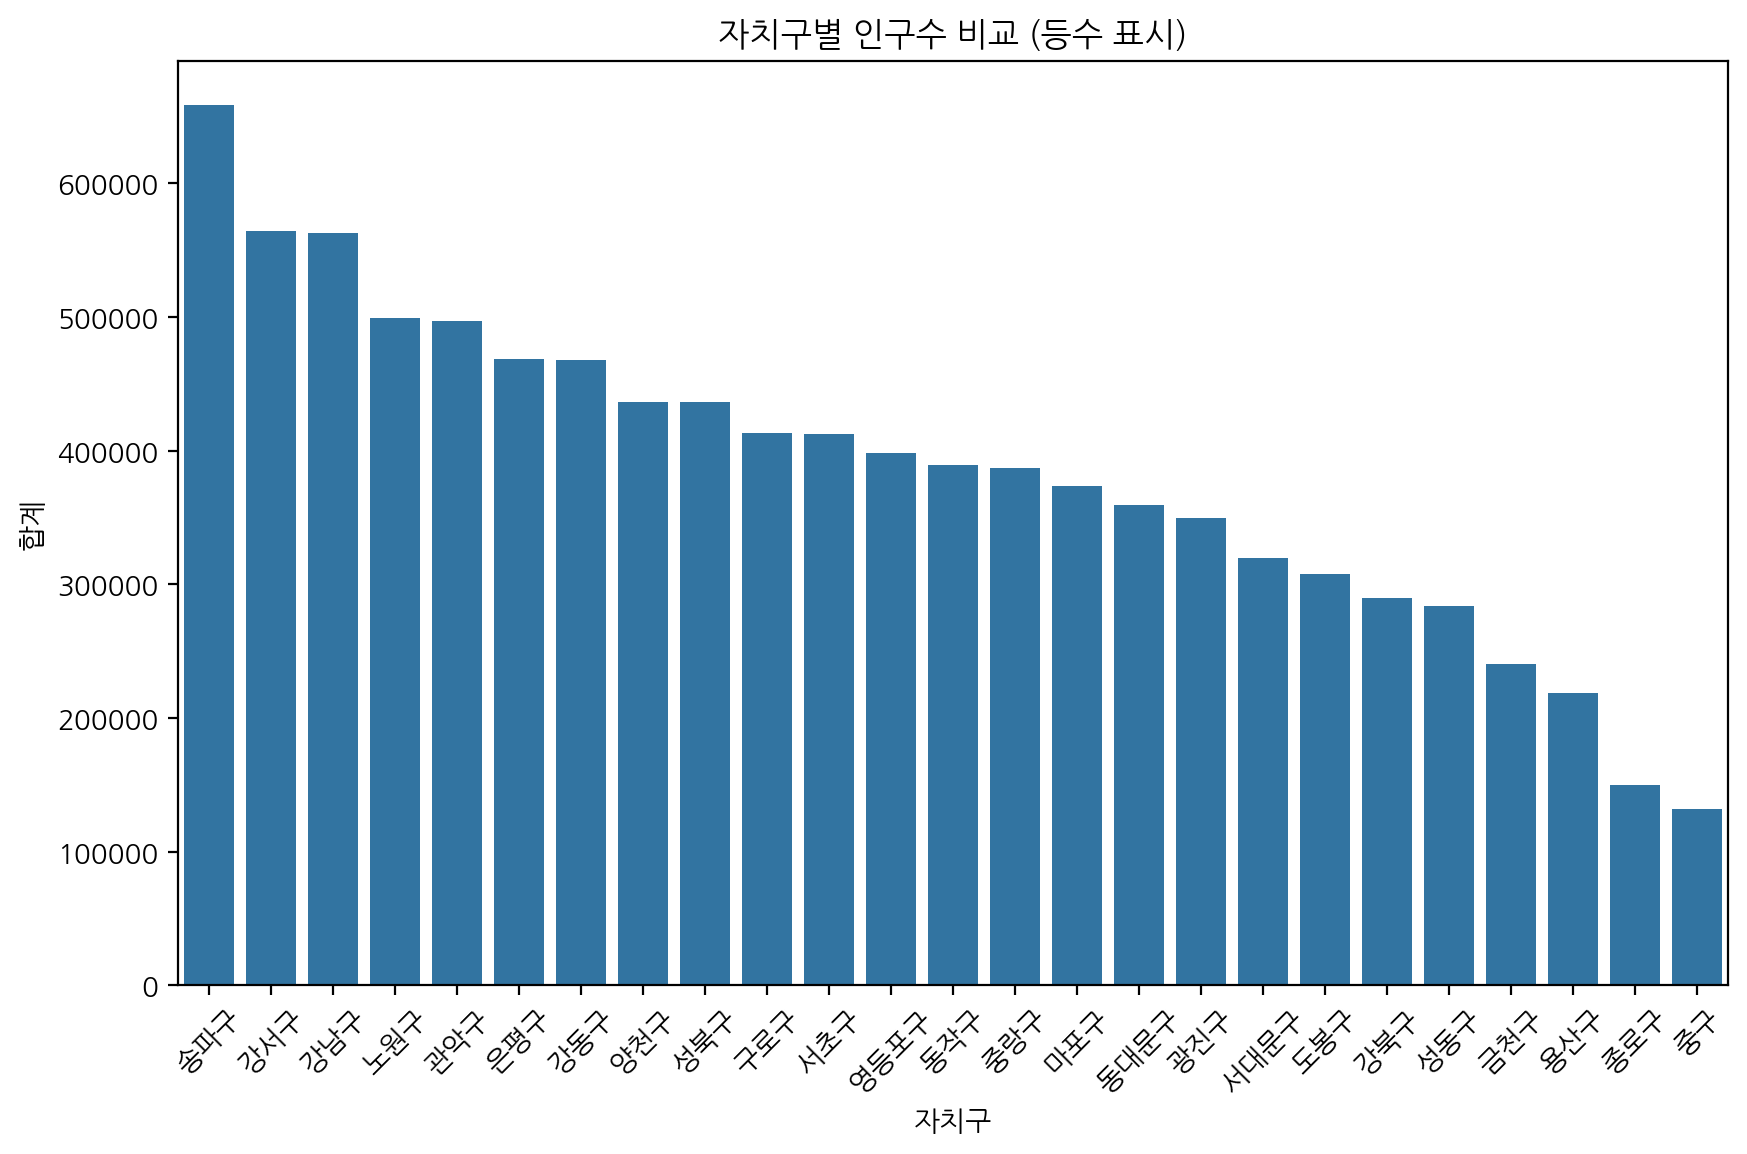

자치구별 인구수 및 등수:
17: 1등
3: 2등
0: 3등
8: 4등
4: 5등
21: 6등
1: 7등
18: 8등
16: 9등
6: 10등
14: 11등
19: 12등
11: 13등
24: 14등
12: 15등
10: 16등
5: 17등
13: 18등
9: 19등
2: 20등
15: 21등
7: 22등
20: 23등
22: 24등
23: 25등


In [133]:
# 혼잡도 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='합계', data=df_sorted)
plt.title('자치구별 인구수 비교 (등수 표시)')
plt.xlabel('자치구')
plt.ylabel('합계')
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

# 각 자치구의 인구수와 등수 출력
print("자치구별 인구수 및 등수:")
for i in range(df_sorted.shape[0]):
    # '자치구'가 아닌 다른 열 이름을 확인
    print(f"{df_sorted.index[i]}: {int(df_sorted['등수'].iloc[i])}등")

# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

### 함수 선언

In [115]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 및 p-value를 출력하고 heatmap을 그리는 함수
def getCorrPValue(df, f1, f2):
    corr, p_value = pearsonr(df[f1], df[f2])  # 상관계수와 p-value 계산
    print(f"상관계수 (r): {corr:.4f}")
    print(f"p-value: {p_value:.4f}")

    # 상관계수 크기에 따른 해석
    if abs(corr) > 0.7:
        print("강한 상관관계가 있습니다.")
    elif abs(corr) > 0.3:
        print("중간 정도의 상관관계가 있습니다.")
    else:
        print("약한 상관관계가 있습니다.")

    # p-value 해석
    if p_value < 0.05:
        print("p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.")
    else:
        print("p-value가 0.05보다 크므로, 귀무가설을 기각하지 못합니다.")

    
    # 산점도 그리기
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[f1], y=df[f2])
    plt.title(f'Scatter Plot of {f1} vs {f2}')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

### 1) 이다연 님

### 혼잡도(총 이동인구/총 이동시간)가 클수록 정노비율(정류장수/노선수)이 작을 것이다.

상관계수 (r): 0.1735
p-value: 0.4069
약한 상관관계가 있습니다.
p-value가 0.05보다 크므로, 귀무가설을 기각하지 못합니다.


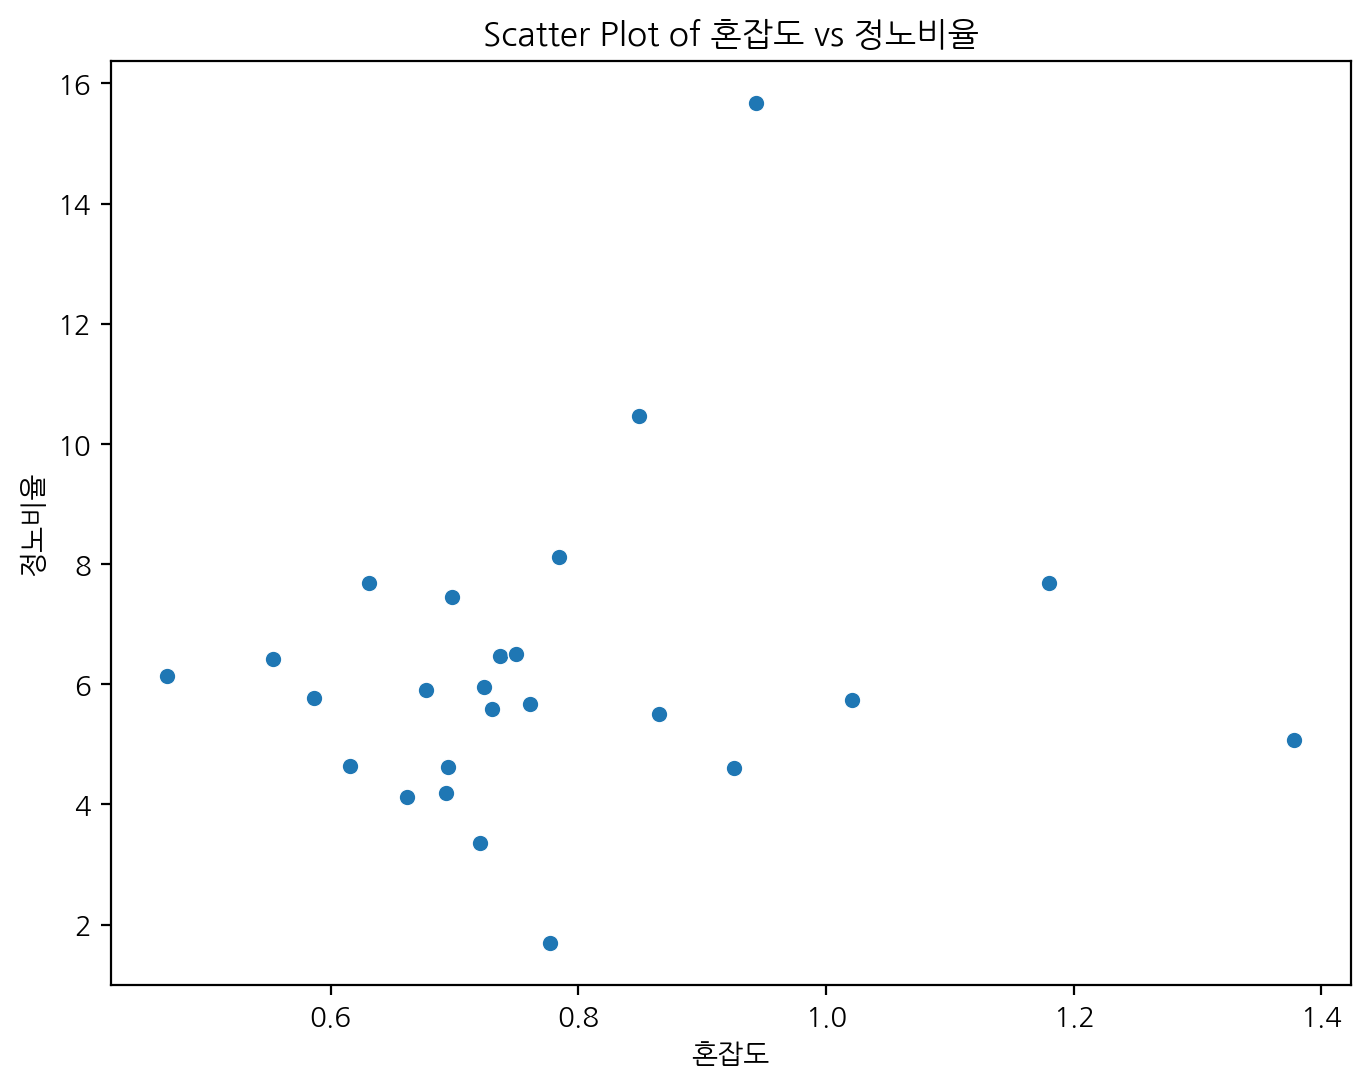

In [117]:
# 상관계수 및 p-value
getCorrPValue(df, '혼잡도', '정노비율')

### 2) 박연규 님

### 정류장 수가 많을 수록 총 이동시간이 오래 걸릴 것이다.

상관계수 (r): 0.4666
p-value: 0.0187
중간 정도의 상관관계가 있습니다.
p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.


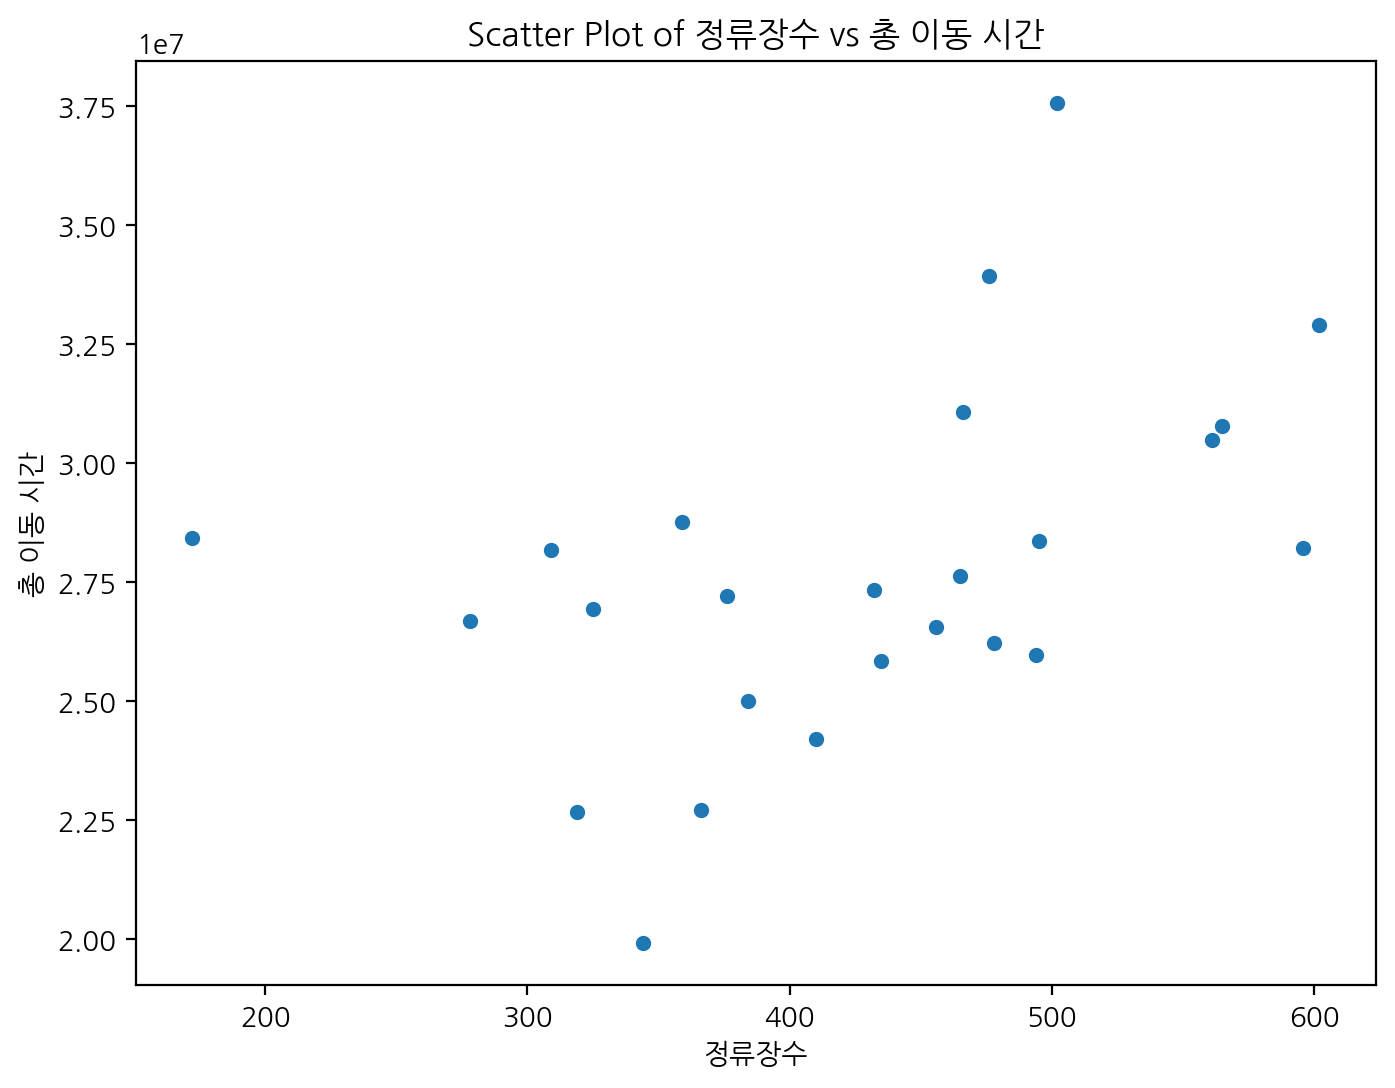

In [119]:
# 상관계수 및 p-value
getCorrPValue(df, '정류장수', '총 이동 시간')

### 업종합계가 클 수록 총 이동인구는 많을 것이다.

상관계수 (r): 0.8813
p-value: 0.0000
강한 상관관계가 있습니다.
p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.


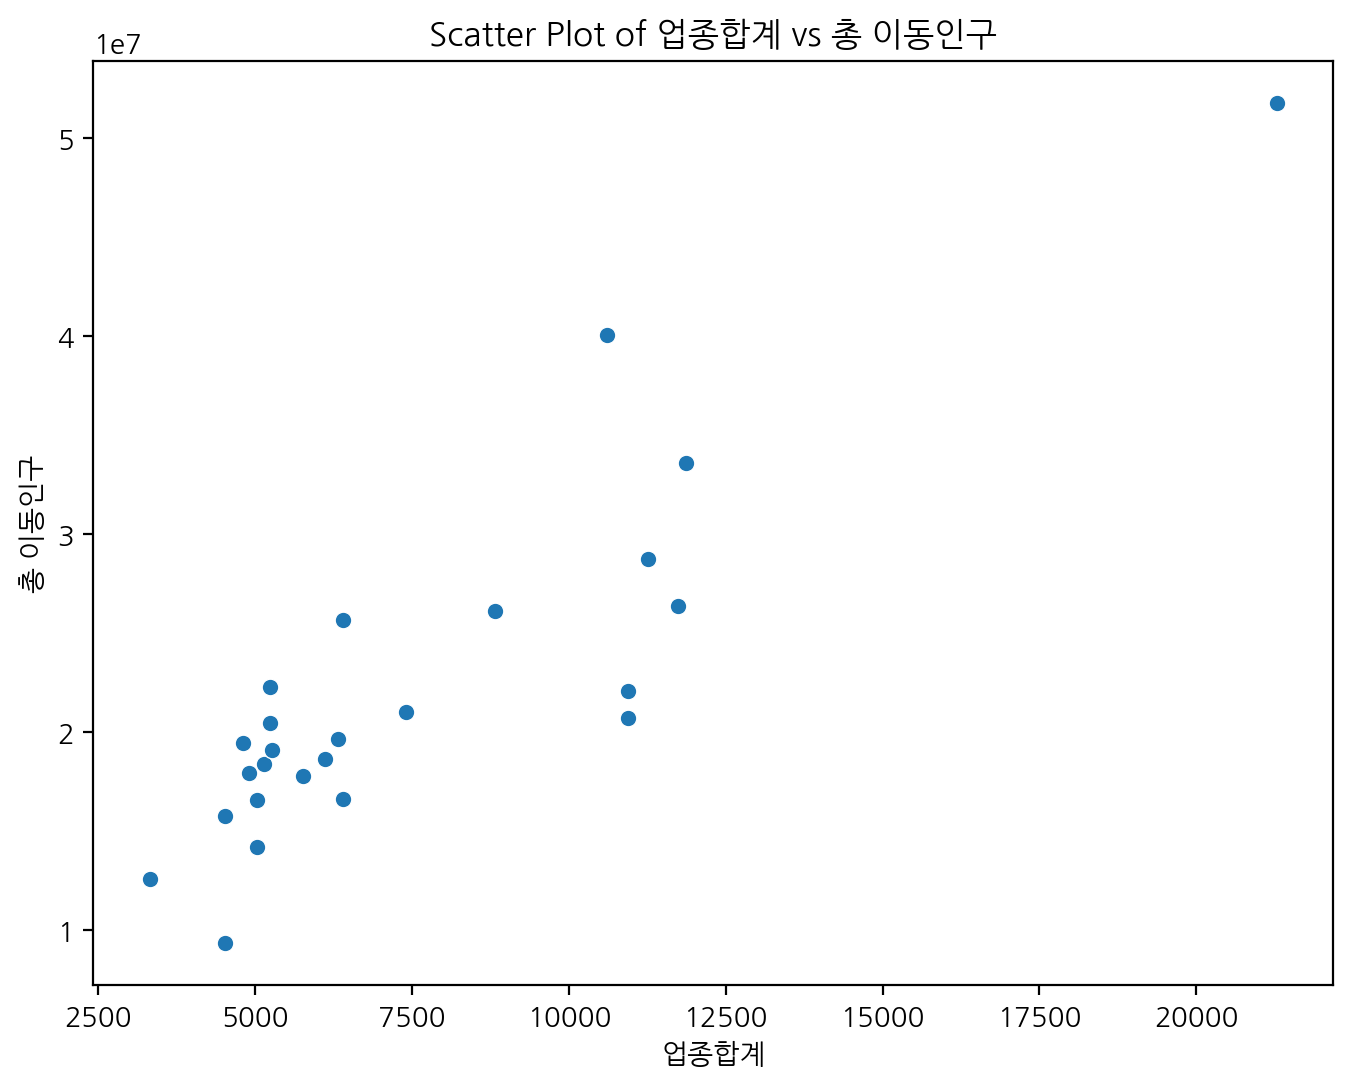

In [121]:
# 상관계수 및 p-value
getCorrPValue(tmp, '업종합계', '총 이동인구')

### 3) 유찬혁 님

### 총 승객수가 많고, 혼잡도(총 이동인구/총 이동시간)가 높고, 인구수가 많은 곳에 노선이 필요할 것이다.

상관계수 (r): 0.4276
p-value: 0.0330
중간 정도의 상관관계가 있습니다.
p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.


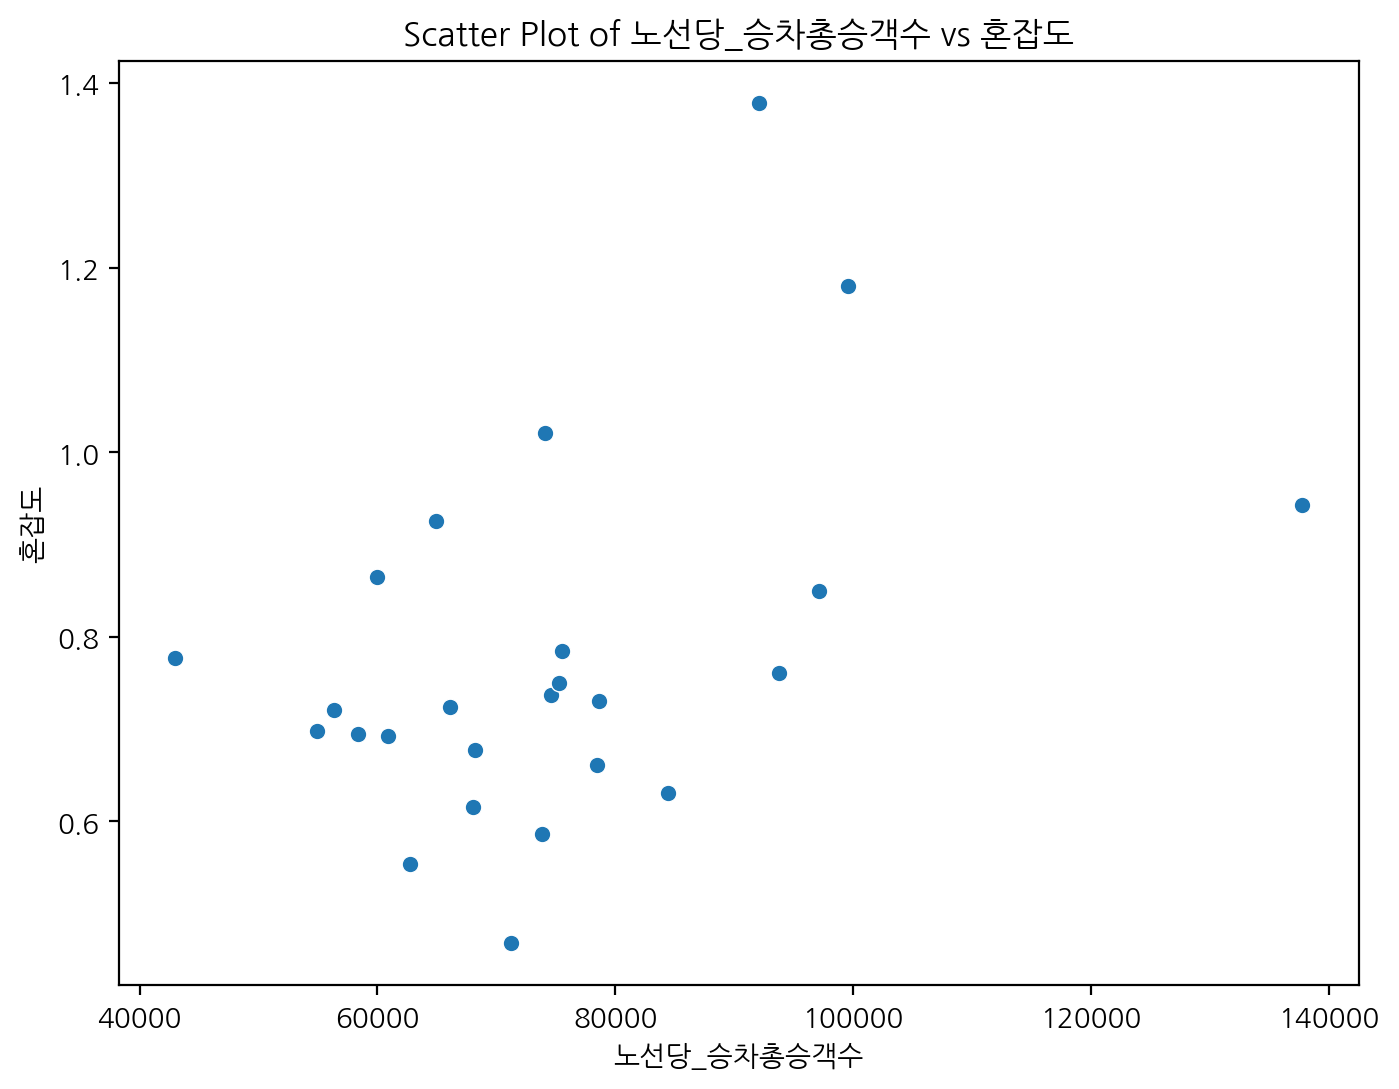

------------------------------------------------------------
상관계수 (r): 0.4178
p-value: 0.0377
중간 정도의 상관관계가 있습니다.
p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.


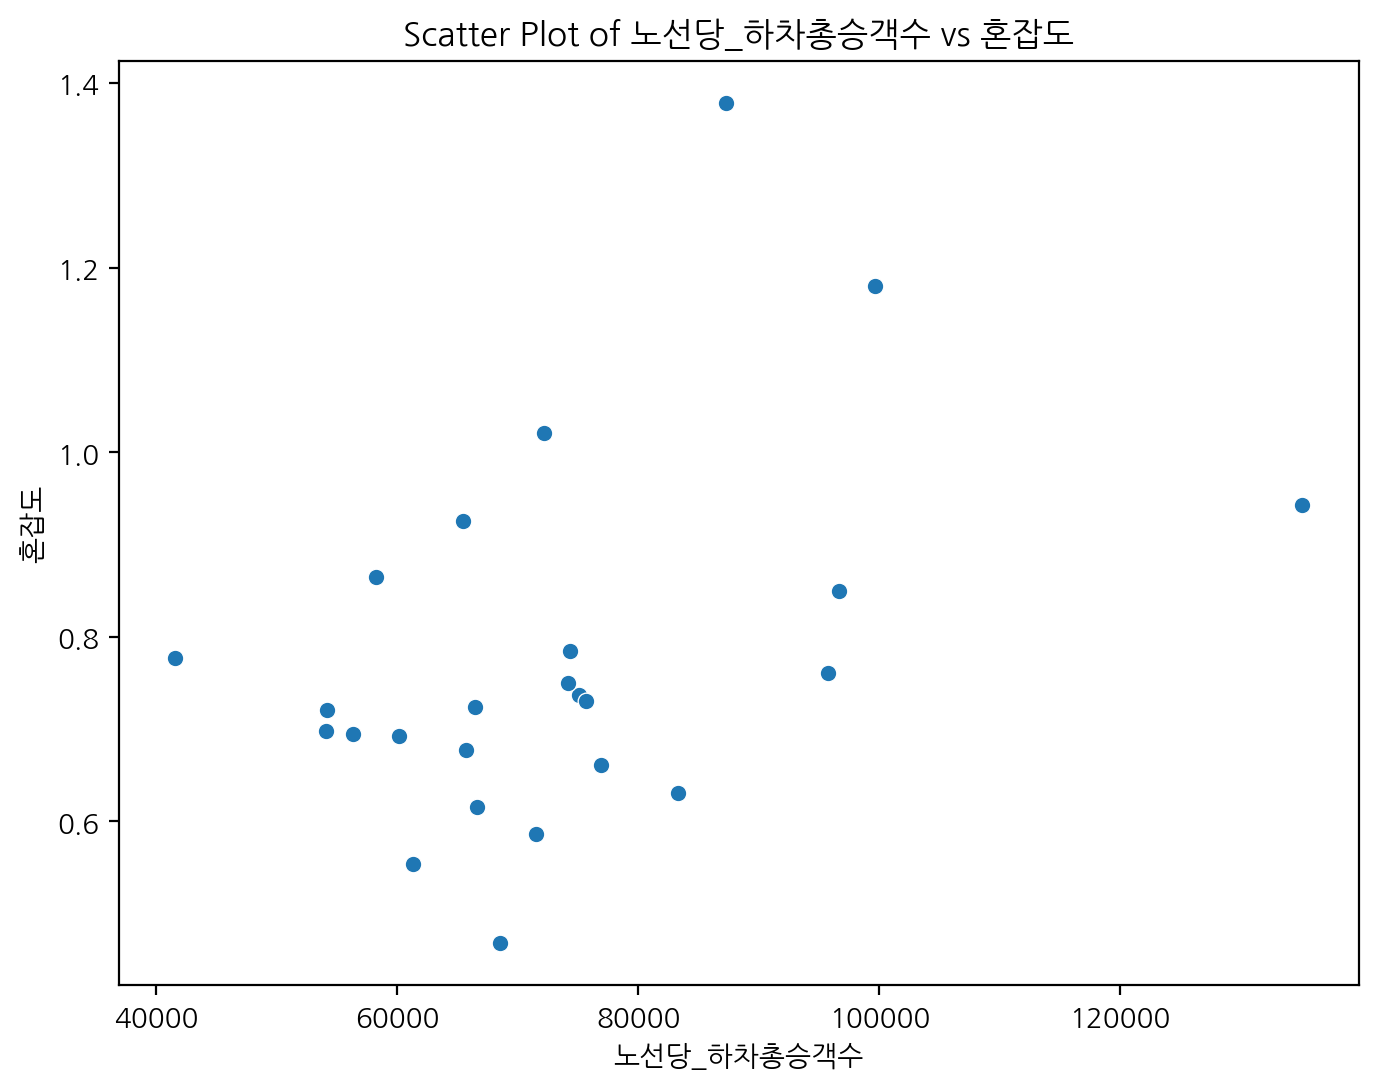

In [123]:
# 승객수 - 혼잡도

# 상관계수 및 p-value
getCorrPValue(df, '노선당_승차총승객수', '혼잡도')
print('-'*60)
getCorrPValue(df, '노선당_하차총승객수', '혼잡도')

상관계수 (r): 0.6695
p-value: 0.0003
중간 정도의 상관관계가 있습니다.
p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.


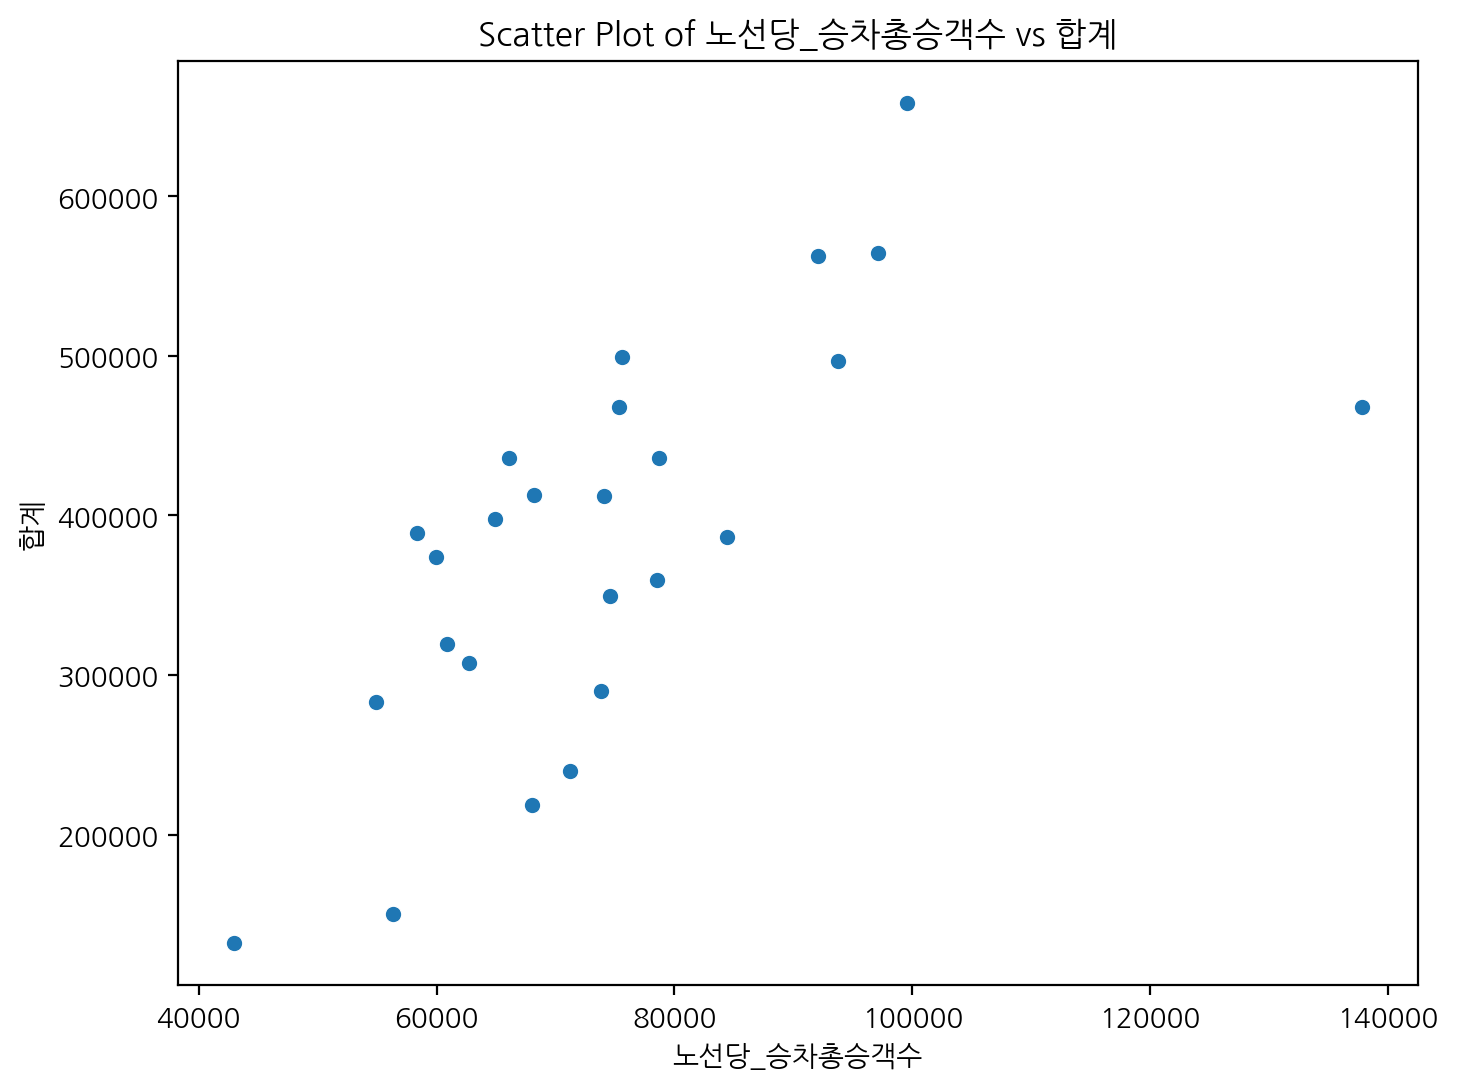

------------------------------------------------------------
상관계수 (r): 0.6803
p-value: 0.0002
중간 정도의 상관관계가 있습니다.
p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.


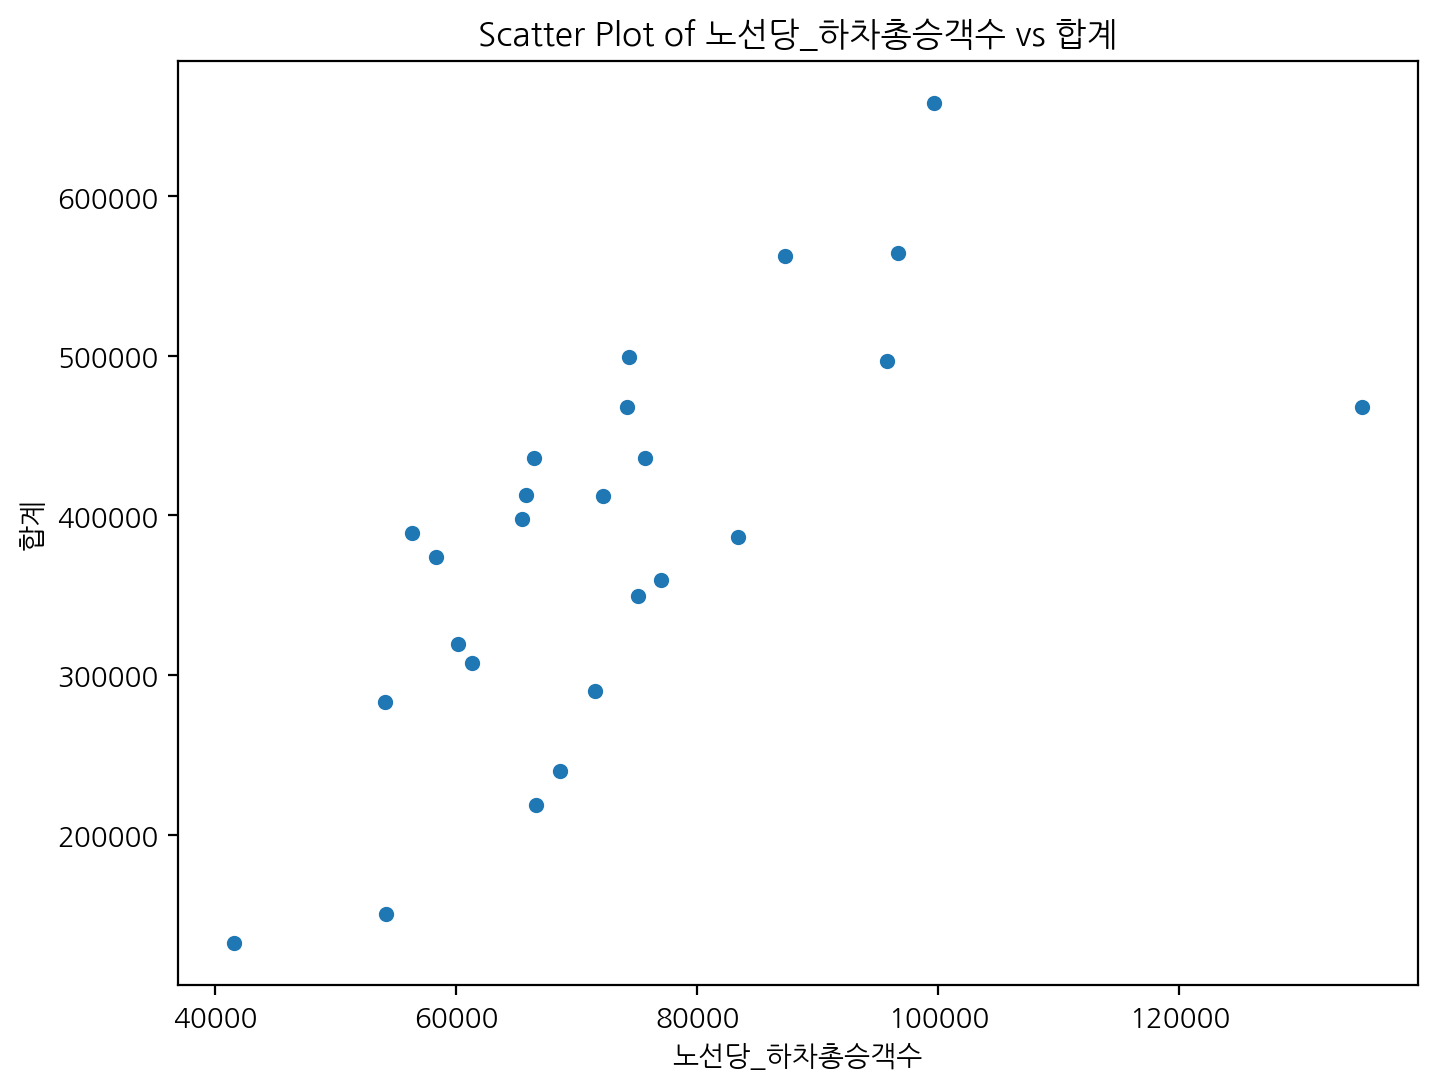

In [125]:
# 승객수 - 인구수

# 상관계수 및 p-value
getCorrPValue(df, '노선당_승차총승객수', '합계')
print('-'*60)
getCorrPValue(df, '노선당_하차총승객수', '합계')

상관계수 (r): 0.6320
p-value: 0.0007
중간 정도의 상관관계가 있습니다.
p-value가 0.05보다 작으므로, 귀무가설을 기각합니다.


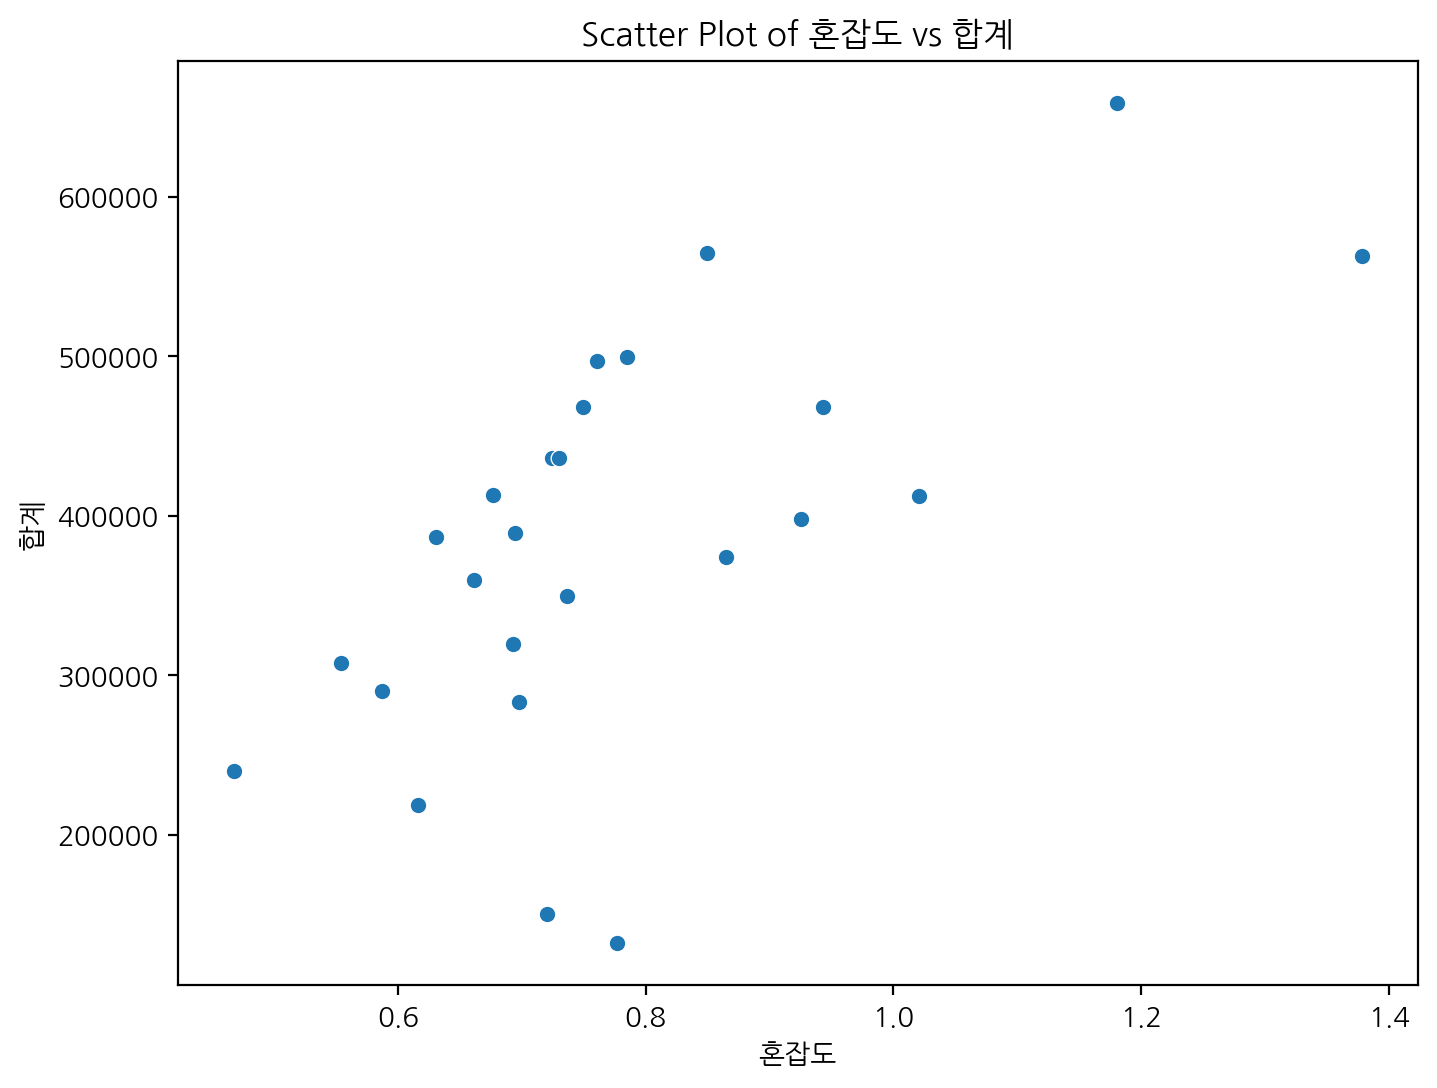

In [127]:
# 혼잡도 - 인구수

# 상관계수 및 p-value
getCorrPValue(df, '혼잡도', '합계')

### HeatMap으로 시각화

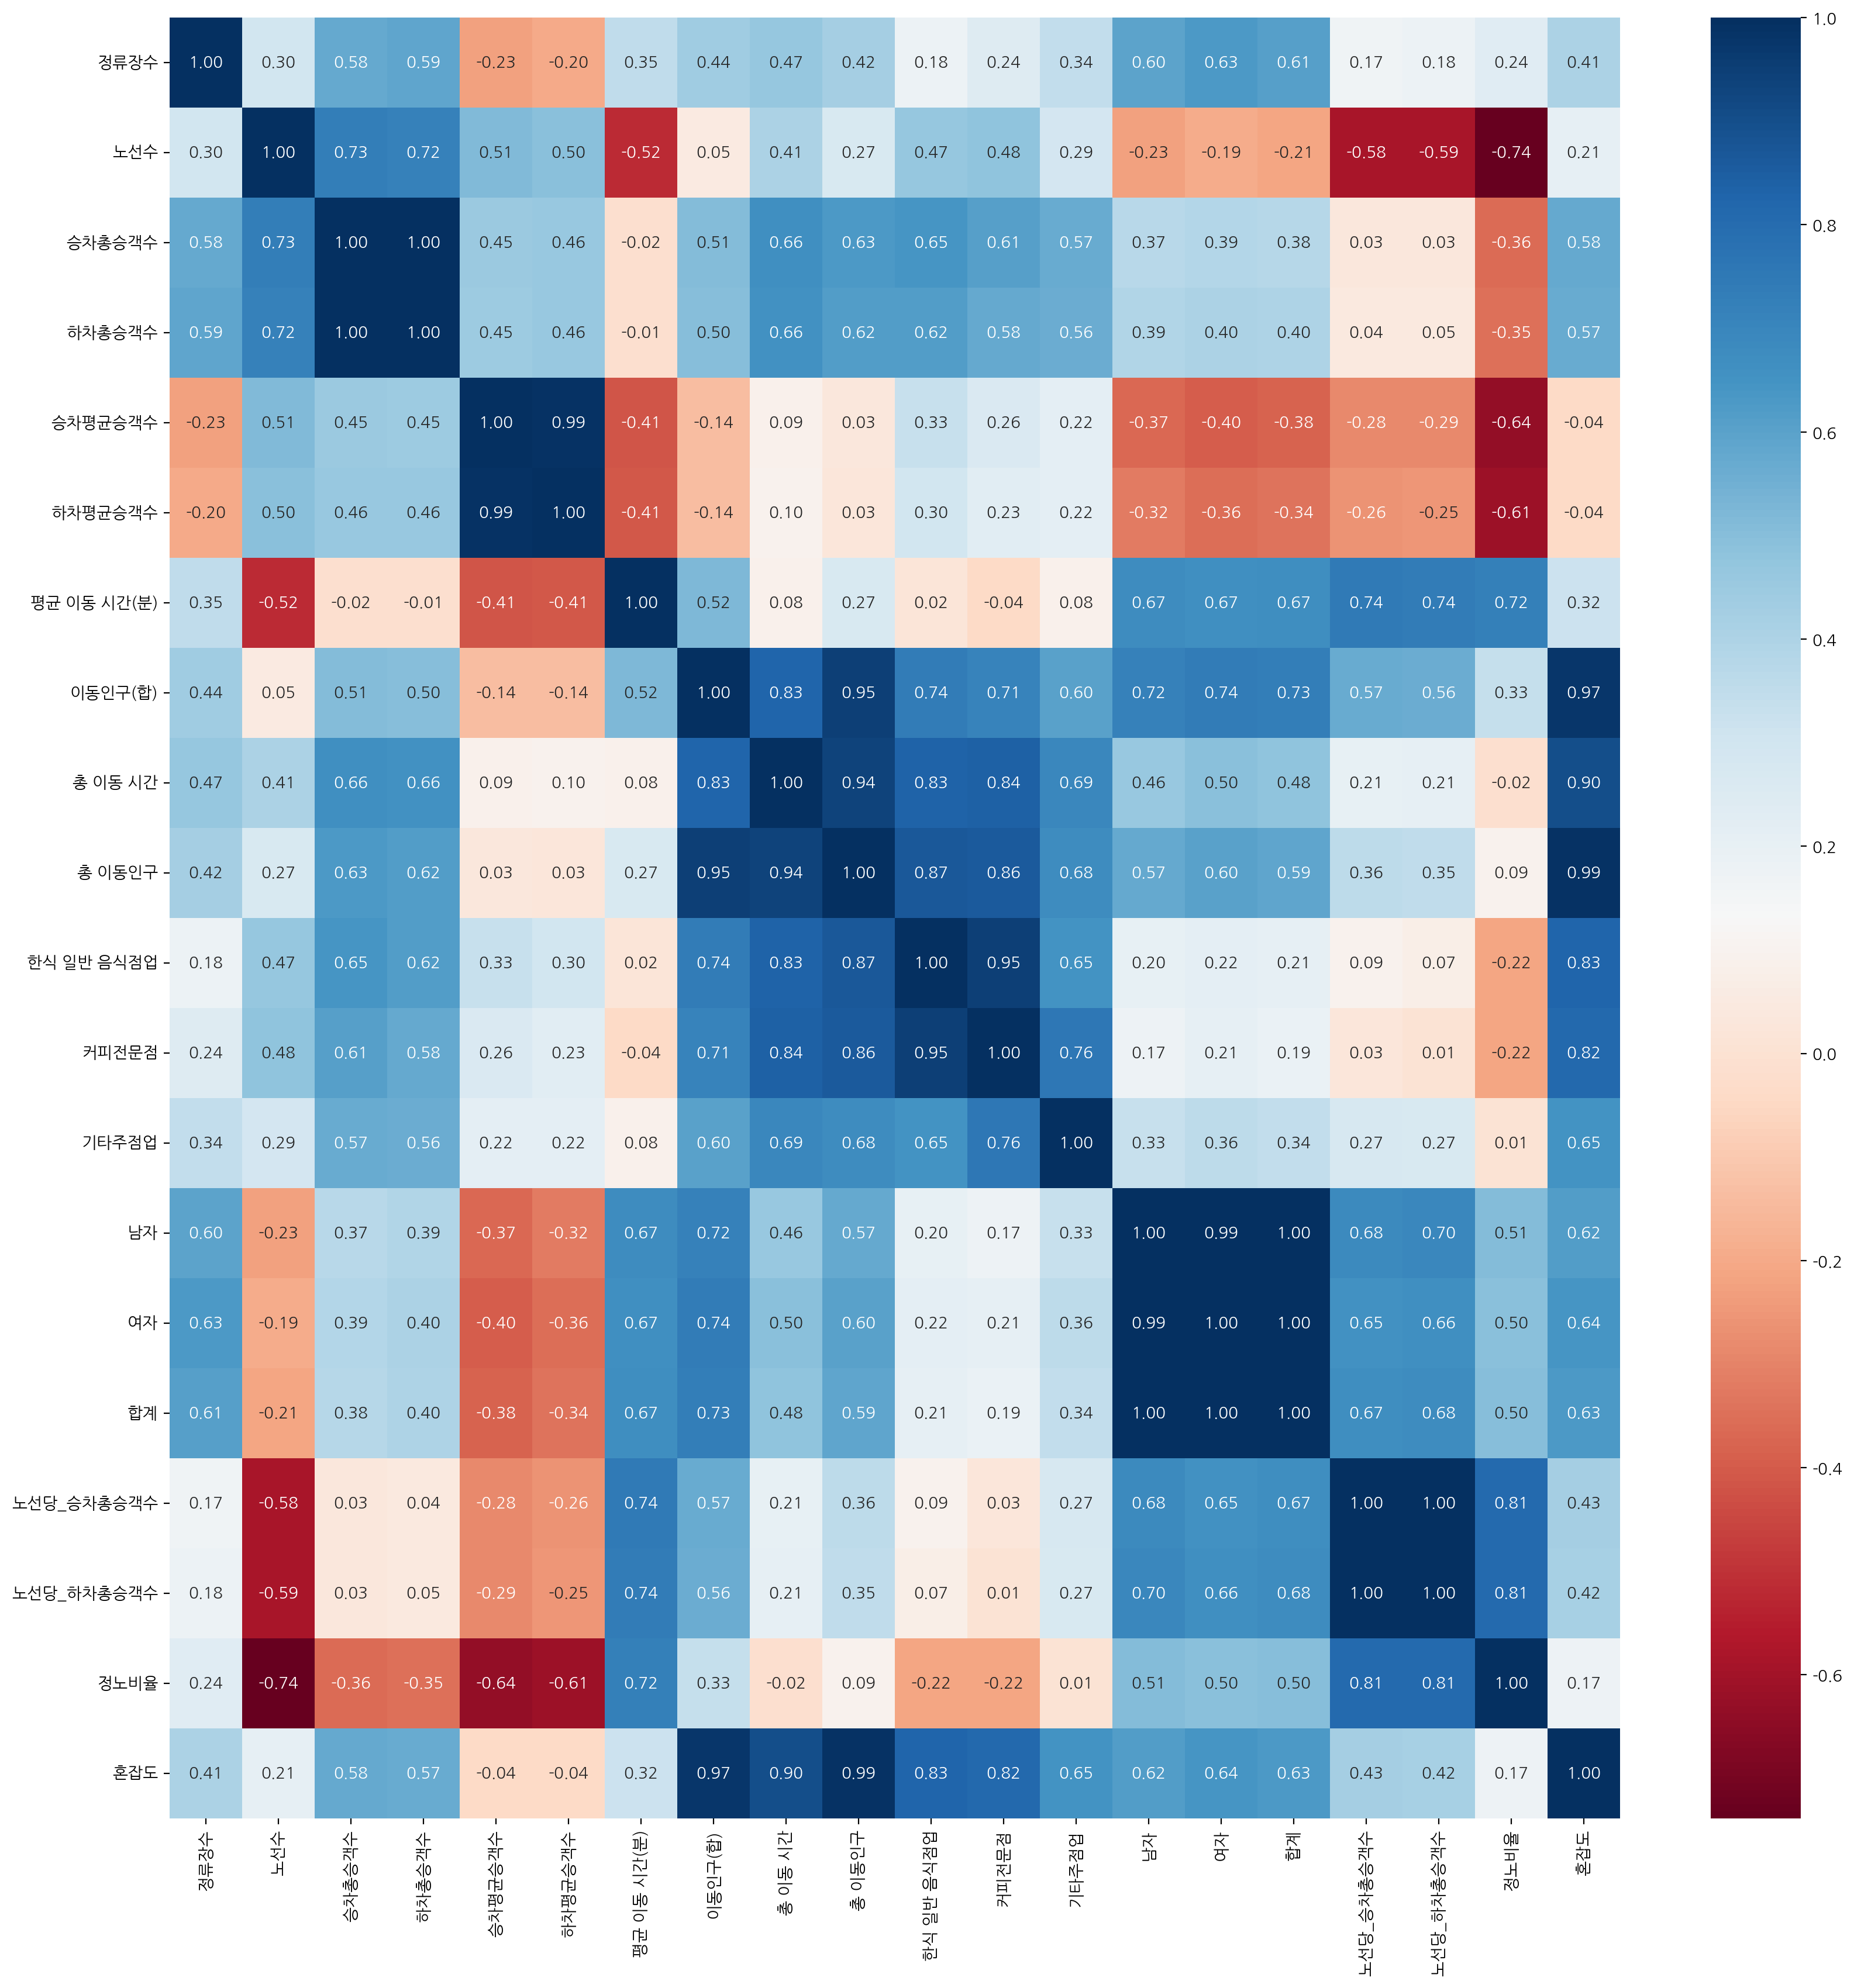

In [102]:
# 상관계수를 HeatMap으로 시각화

df.set_index('자치구', inplace=True)
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.show()

# 6. 관계 정리

### 1) 강한 관계

- 업종합계 - 총 이동 인구 : 상관계수 = 0.8813, p-value = 0.0000
- 총 승객수 - 인구수 : 상관계수 = 0.6754, p-value = 0.0002
- 혼잡도 - 인구수 : 상관계수 = 0.6320, p-value = 0.0007

### 2) 중간 관계

- 정류장 수 - 총 이동 시간 : 상관계수 = 0.4666, p-value = 0.0187
- 총 승객수 - 혼잡도 : 상관계수 = 0.4230, p-value = 0.0352

### 3) 관계 없음

- 혼잡도 - 정노비율 : 상관계수 = 0.6320, p-value = 0.00079

# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

### 1) 

```
중앙값 기준  추가 노선이 필요한 구
- 혼잡도 : 강남구, 관악구, 마포구, 서초구, 영등포구, 중구
- 정류장수 : 강남구, 강서구, 관악구, 노원구, 마포구, 서초구, 성북구, 송파구, 영등포구
- 업종합계 : 용산구
- 총 승객수 : 광진구, 동대문구, 중랑구

여러 상관관계를 파악해 겹친 강남구, 관악구, 영등포구에 노선 확충이 필요하다. 셋 중에서는 강남구가 가장 필요하다.
```

### 2) 

```
- 업종합계(종사자) 수가 낮은데 이동 인구가 큰 경우 노선을 확충해야 한다.
- 강서구와 송파구의 노선을 확충해야 한다.

따라서 중구, 동대문구, 종로구, 강동구에 대중 교통 수요가 있으며 노선 확충이 필요하다.
```

### 3) 

```
승차 및 하차 승객수(유동인구), 혼잡도, 인구수 3가지 항목 모두 각 변수 별 상관관계가 유의미하다.

- 총 승객수 상위 3개 강동구, 송파구, 강서구
- 혼잡도 상위 3개 강남구, 송파구, 서초구
- 인구수 상위 3개 송파구, 강서구, 강남구


3가지 항목 모두 TOP3에 해당하는 자치구는 송파구.
송파구는 3가지 항목 모두 높은 값을 나타내고 있고, 해당 분석 결과가 유의미 하므로 노선을 추가하여 교통 혼잡을 예방할 수 있을 것이다.
```

### 결론1: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

```
송파구
```

### 결론2: 그 이유는 무엇인가요?

```
송파구는 각 가설 별로 시각화 결과와 상관분석 결과가 유의미하게 나타났다.
또한, 최근 송파구 위주의 8호선이 남양주 지역까지 증설되면서 더욱 유동인구가 많이 늘어날 것으로 예측된다. 
따라서 송파구에 버스 노선을 추가해 대중교통 이용 인구를 분산시켜 교통혼잡을 예방해야 한다.
```